# Basic cleaning

## Importing libraries

In [3]:
## Importing Libraries for Exploratory Data Analysis


# !pip install sktime
# !pip install pmdarima
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
from sktime.forecasting.arima import AutoARIMA
from sklearn.preprocessing import LabelEncoder
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

## Data Acquisition:

In [4]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

## Data Inspection:

In [5]:
df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545


In [6]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811663 entries, 0 to 811662
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           811663 non-null  int64  
 1   Date Rptd       811663 non-null  object 
 2   DATE OCC        811663 non-null  object 
 3   TIME OCC        811663 non-null  int64  
 4   AREA            811663 non-null  int64  
 5   AREA NAME       811663 non-null  object 
 6   Rpt Dist No     811663 non-null  int64  
 7   Part 1-2        811663 non-null  int64  
 8   Crm Cd          811663 non-null  int64  
 9   Crm Cd Desc     811663 non-null  object 
 10  Mocodes         699639 non-null  object 
 11  Vict Age        811663 non-null  int64  
 12  Vict Sex        705139 non-null  object 
 13  Vict Descent    705131 non-null  object 
 14  Premis Cd       811654 non-null  float64
 15  Premis Desc     811184 non-null  object 
 16  Weapon Used Cd  282783 non-null  float64
 17  Weapon Des

In [8]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.116630e+05,811663.000000,811663.000000,811663.000000,811663.000000,811663.000000,811663.000000,811654.000000,282783.000000,811653.000000,59815.000000,2000.000000,60.000000,811663.000000,811663.000000
mean,2.159652e+08,1335.588916,10.712678,1117.690694,1.413998,500.745704,29.828150,305.789181,362.905429,500.483809,957.470099,983.554000,990.766667,33.978513,-118.024077
std,1.077479e+07,654.136069,6.092110,609.205985,0.492548,207.814959,21.769578,216.625659,123.741738,207.603529,111.587116,52.917211,27.912919,1.800082,6.241544
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.101207e+08,900.000000,6.000000,622.000000,1.000000,331.000000,8.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.013600,-118.429600
50%,2.201116e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321500
75%,2.219102e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [9]:
df.describe(include='all')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
count,8.116630e+05,811663,811663,811663.000000,811663.000000,811663,811663.000000,811663.000000,811663.000000,811663,...,811663,811663,811653.000000,59815.000000,2000.000000,60.000000,811663,129872,811663.000000,811663.000000
unique,NaN,1371,1371,NaN,NaN,21,NaN,NaN,NaN,138,...,6,6,NaN,NaN,NaN,NaN,63575,9649,NaN,NaN
top,NaN,02/03/2023 12:00:00 AM,12/02/2022 12:00:00 AM,NaN,NaN,Central,NaN,NaN,NaN,VEHICLE - STOLEN,...,IC,Invest Cont,NaN,NaN,NaN,NaN,800 N ALAMEDA ST,BROADWAY,NaN,NaN
freq,NaN,924,1130,NaN,NaN,54556,NaN,NaN,NaN,86816,...,649585,649585,NaN,NaN,NaN,NaN,1473,2160,NaN,NaN
mean,2.159652e+08,NaN,NaN,1335.588916,10.712678,NaN,1117.690694,1.413998,500.745704,NaN,...,NaN,NaN,500.483809,957.470099,983.554000,990.766667,NaN,NaN,33.978513,-118.024077
std,1.077479e+07,NaN,NaN,654.136069,6.092110,NaN,609.205985,0.492548,207.814959,NaN,...,NaN,NaN,207.603529,111.587116,52.917211,27.912919,NaN,NaN,1.800082,6.241544
min,8.170000e+02,NaN,NaN,1.000000,1.000000,NaN,101.000000,1.000000,110.000000,NaN,...,NaN,NaN,110.000000,210.000000,310.000000,821.000000,NaN,NaN,0.000000,-118.667600
25%,2.101207e+08,NaN,NaN,900.000000,6.000000,NaN,622.000000,1.000000,331.000000,NaN,...,NaN,NaN,331.000000,998.000000,998.000000,998.000000,NaN,NaN,34.013600,-118.429600
50%,2.201116e+08,NaN,NaN,1415.000000,11.000000,NaN,1142.000000,1.000000,442.000000,NaN,...,NaN,NaN,442.000000,998.000000,998.000000,998.000000,NaN,NaN,34.058400,-118.321500
75%,2.219102e+08,NaN,NaN,1900.000000,16.000000,NaN,1617.000000,2.000000,626.000000,NaN,...,NaN,NaN,626.000000,998.000000,998.000000,998.000000,NaN,NaN,34.163100,-118.273900


## Converting Date and Time:

In [10]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['Date Rptd'] = pd.DatetimeIndex(df['Date Rptd']).date
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['DATE OCC'] = pd.DatetimeIndex(df['DATE OCC']).date
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'].astype(str).str.zfill(4), format='%H%M%S').dt.time

## Handling Missing Values

In [11]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           112024
Vict Age               0
Vict Sex          106524
Vict Descent      106532
Premis Cd              9
Premis Desc          479
Weapon Used Cd    528880
Weapon Desc       528880
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          751848
Crm Cd 3          809663
Crm Cd 4          811603
LOCATION               0
Cross Street      681791
LAT                    0
LON                    0
dtype: int64

In [12]:
df.dropna(subset=['Vict Sex','Premis Cd'], inplace = True)

In [13]:
df.drop(columns=['Mocodes','Cross Street'],inplace=True)

In [14]:
fill_values = {'Vict Descent': 'Unknown', 'Premis Desc': 'NA'}
df = df.fillna(fill_values)

In [15]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex               0
Vict Descent           0
Premis Cd              0
Premis Desc            0
Weapon Used Cd    422482
Weapon Desc       422482
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          645477
Crm Cd 3          703140
Crm Cd 4          705079
LOCATION               0
LAT                    0
LON                    0
dtype: int64

## Dropping duplicates

In [16]:
df.drop_duplicates(inplace=True,keep='first')

## Encoding Data

In [17]:
encoder = LabelEncoder()
df['Vict Sex Encoded'] = encoder.fit_transform(df['Vict Sex'])

Please Note there are 5 genders here ['F':Female,'M':Male,'X':NonBinary,'H':Transgender,'-':Unknown]

Please Note that these are the categories:
'B' - Black or African American
'H' - Hispanic or Latino
'X' - Other
'W' - White
'A' - Asian
'O' - Middle Eastern or Arab
'C' - American Indian or Alaska Native
'F' - Filipino
'K' - Korean
'I' - Indian
'V' - Vietnamese
'Z' - Chinese
'J' - Japanese
'P' - Pacific Islander
'Unknown' - Data Missing or Not Specified
'G' - Guamanian or Chamorro
'U' - Hawaiian
'D' - Samoan
'S' - Samoan
'L' - Laotian
'-' - Unknown or Not Specified

In [18]:
df['Vict Descent Encoded'] = encoder.fit_transform(df['Vict Descent'])

In [19]:
# Replace negative values with 0 in the 'Age' column

df['Vict Age'] = df['Vict Age'].apply(lambda x: 0 if x < 0 else x)

# Exploratory Data Analysis (EDA)

## Overall Crime Trends

In [20]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
filtered_df = df[df['DATE OCC'] < datetime(2023, 10, 1)]

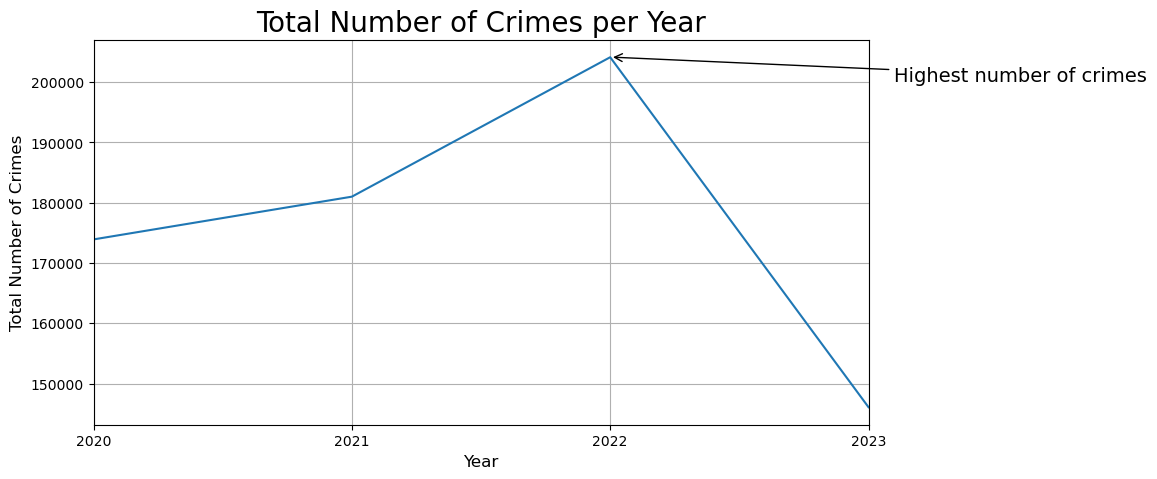

In [21]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

df['Year'] = df['DATE OCC'].dt.year
crime_counts = df.groupby('Year',as_index=False).agg({'DR_NO':'count'})
crime_counts.columns = ['Year','crime_count']

plt.figure(figsize=(10, 5))
sns.lineplot(x=crime_counts.Year, y=crime_counts.crime_count)
plt.title('Total Number of Crimes per Year',fontsize=20)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Total Number of Crimes',fontsize=12)

plt.xlim(df['Year'].min(), df['Year'].max())
plt.locator_params(axis='x', nbins=abs(df['Year'].min() - df['Year'].max())+1)
from datetime import datetime
plt.annotate('Highest number of crimes', xy=(2022,204150), xytext=(2023.1,200200),
             arrowprops=dict(arrowstyle='->'),fontsize=14)

plt.grid(True)

plt.show()

In [22]:
crime_counts[crime_counts['Year']==2022]

,Year,crime_count
2,2022,204125


## Seasonal Patterns

In [23]:
df['Month'] = df['DATE OCC'].dt.month
df['Year'] = df['DATE OCC'].dt.year

crimes_by_month = df.groupby(['Year', 'Month'])['DATE OCC'].count()
average_crimes_per_month = crimes_by_month.unstack().mean()
average_crimes_per_month = average_crimes_per_month.astype(int)

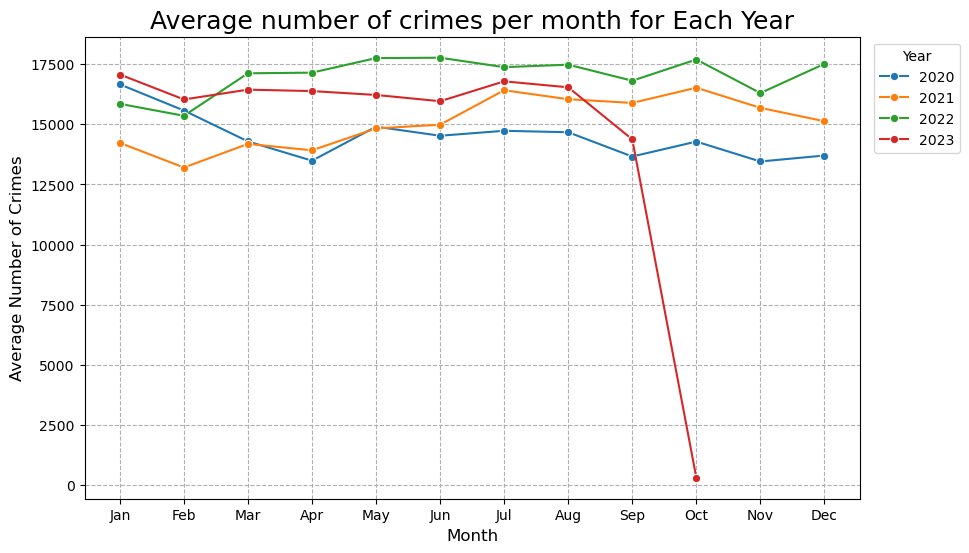

In [24]:
years = average_crimes_per_month.index
plt.figure(figsize=(10, 6))

for year in crimes_by_month.index.get_level_values('Year').unique():
    data_to_plot = crimes_by_month.xs(year, level='Year')
    sns.lineplot(data=data_to_plot, marker="o", dashes=False, label=year)
    
plt.title(f'Average number of crimes per month for Each Year', fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec'])
plt.ylabel('Average Number of Crimes', fontsize=12)
plt.legend(title='Year',bbox_to_anchor=(1.01, 1), loc='upper left')

plt.grid(True,linestyle='--')
plt.show()


# Most Common Crime Type

In [25]:
# Count the occurrences of each crime type
crime_type_count = df['Crm Cd Desc'].value_counts()

# Find the crime type with the highest frequency
most_common_crime_type = crime_type_count.idxmax()
highest_frequency = crime_type_count.max()

print("Most common crime type:", most_common_crime_type)
print("Frequency:", highest_frequency)

Most common crime type: BATTERY - SIMPLE ASSAULT
Frequency: 64559


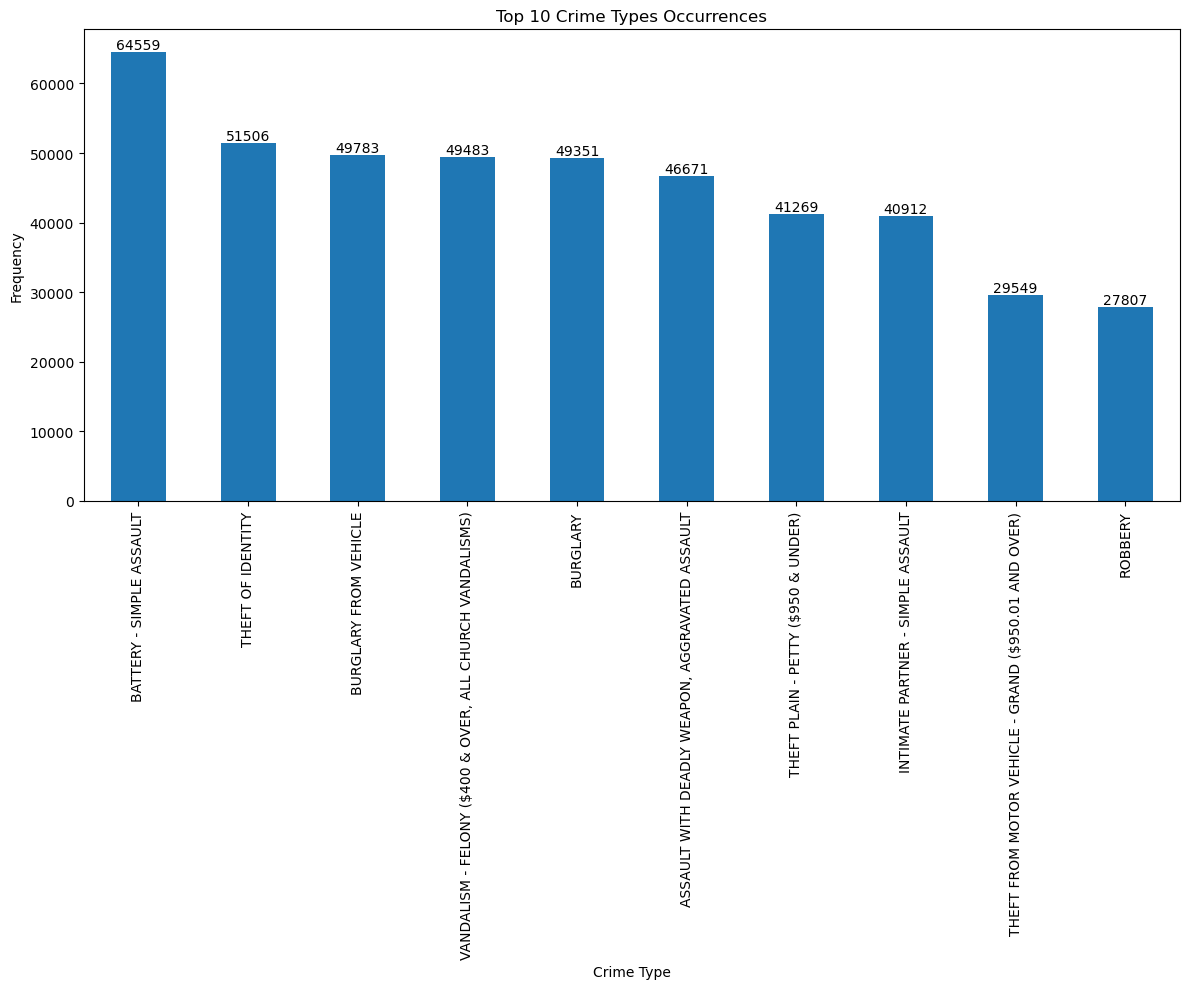

In [26]:
# Top 10 crime types with the highest frequencies
top_10_crime_types = crime_type_count.head(10)


plt.figure(figsize=(12, 10))  
top_10_crime_types.plot(kind='bar')
plt.title('Top 10 Crime Types Occurrences')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 

for index, value in enumerate(top_10_crime_types):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Observations :

1. Theft of Identity is the second most common crime type, with 51,506 occurrences. Identity theft is a significant issue and has a high frequency in reported incidents.

1. Burglary from Vehicle and Vandalism - Felony ($400 & Over, All Church Vandalisms) have similar frequencies, with approximately 49,783 and 49,483 occurrences, respectively. This suggests a notable number of vehicle burglaries and felony vandalism cases.

1. Burglary is another common crime type, with 49,351 occurrences. Burglaries, in general, are reported frequently.

# Regional Differences

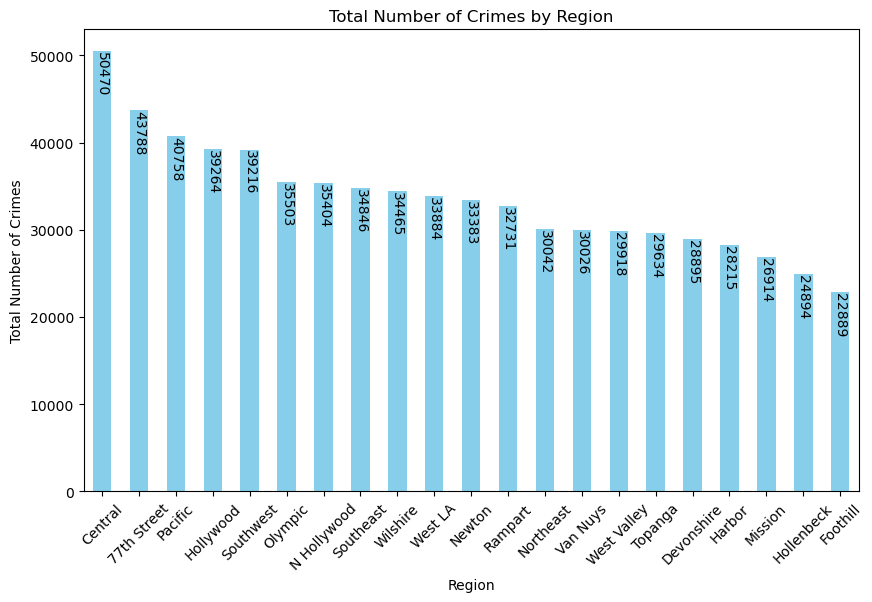

In [27]:
# Grouping the data by Area Name
grouped_data = df.groupby('AREA NAME')

# Getting crime count for each Region
crime_counts = grouped_data['Crm Cd Desc'].count().sort_values(ascending = False)

# Creating a bar plot to show the distribution of crime counts by region 
fig, ax = plt.subplots(figsize=(10, 6))

# plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar', color='skyblue', ax= ax)
plt.title('Total Number of Crimes by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)

# Adding text labels for each bar
for i, v in enumerate(crime_counts):
    ax.text(i, v, str(v), ha='center', va='top', rotation = 270 , fontsize = 10)
    
plt.show()

Observations :
1. The area, Foothill has the lowest crime count of 22889.
1. The area, Central has the highest crime count of 50470.
1. Central, 77th Street, and Pacific are the areas with the highest reported crime counts, with 50,470, 43,788, and 40,758 cases, respectively. This suggests that these areas may have higher crime rates compared to others.
1. Foothill has the lowest reported crime count among all the listed areas, with only 22,889 cases. This area appears to have a relatively lower crime rate compared to the others.
1. Hollywood, Southwest, and Olympic have similar crime counts, ranging from 39,216 to 39,264 cases. These areas have moderately high reported crime rates.
1. Harbor, Mission, and Hollenbeck have relatively lower reported crime counts, ranging from 24,894 to 28,215 cases, indicating that these areas may have lower crime rates compared to the top-ranking areas.

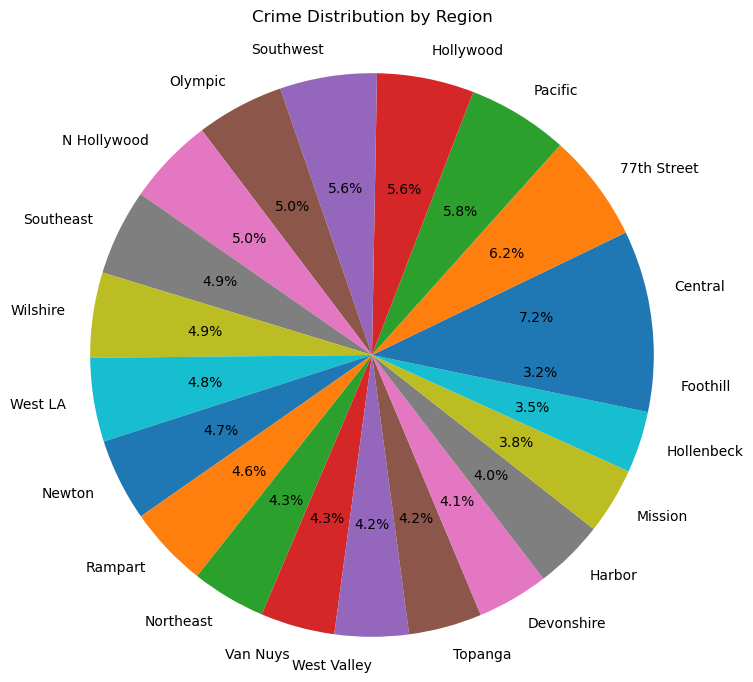

In [28]:
# Creating a pie chart to show the distribution of crimes by region
plt.figure(figsize=(8, 8))
plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%')
plt.title('Crime Distribution by Region\n')
plt.axis('equal')
plt.show()

Observations :

1. The area, Foothill has the lowest percentage of crime count of 3.2%.
1. The area, Central has the highest percentage of crime count of 7.2%.

<Figure size 1000x600 with 0 Axes>

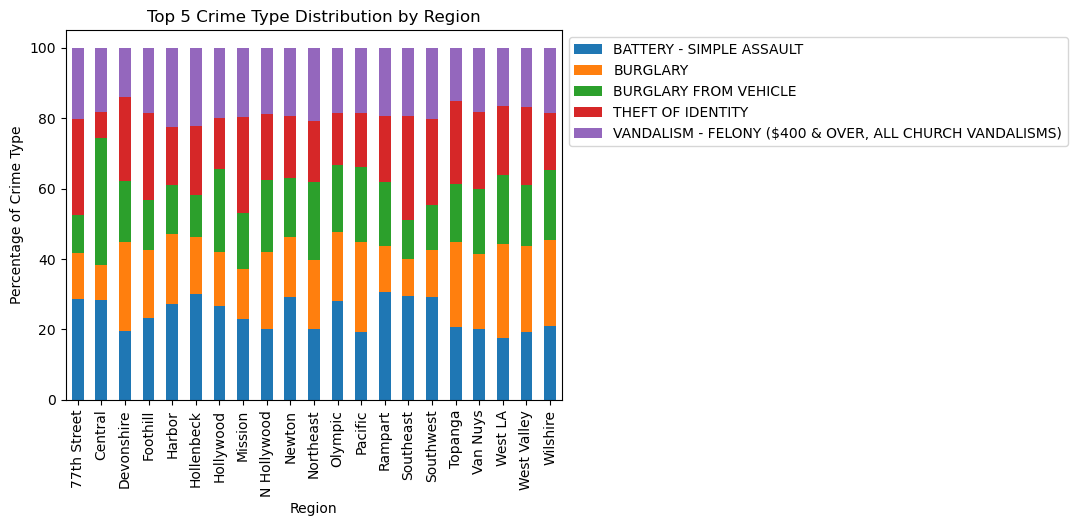

In [29]:
# Creating stacked bar chart to show the distribution of crime type in different regions

# Get the top 5 crimes by count
top_5_crimes = df['Crm Cd Desc'].value_counts().index.to_list()[:5]

# Filter the crime data to only include the top 5 crimes
df_cleaned_filtered = df[df['Crm Cd Desc'].isin(top_5_crimes)]

# Group the filtered crime data by region and crime type
crime_by_region_type = df_cleaned_filtered.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack()

# Calculate the percentage of each crime type in each region
crime_by_region_type_percent = crime_by_region_type.div(crime_by_region_type.sum(axis=1), axis=0) * 100

# Create a stacked bar chart of the percentage of each crime type in each region
plt.figure(figsize=(10, 6))
crime_by_region_type_percent.plot(kind='bar', stacked=True)

# Set the title and labels of the plot
plt.title('Top 5 Crime Type Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Crime Type')

# Add a legend to the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


Observations :
1. Variation in Crime Rates: There is a significant variation in the crime rates for different types of crimes across different areas. For example, "BATTERY - SIMPLE ASSAULT" is highest in the 77th Street area, while "BURGLARY FROM VEHICLE" is highest in Central area.
1. Regional Differences: Different areas have different crime profiles. For instance, "VANDALISM - FELONY" is relatively high in Harbor and Hollenbeck areas, while "THEFT OF IDENTITY" is higher in areas like Southeast.
1. Identity Theft: "THEFT OF IDENTITY" seems to be relatively high in Mission and 77th Street areas, indicating potential issues related to identity theft in those regions.
1. Vandalism Rates: "VANDALISM - FELONY" rates vary, with Harbor and Hollenbeck having higher rates, while Topanga has the lowest rate.

<Figure size 1000x600 with 0 Axes>

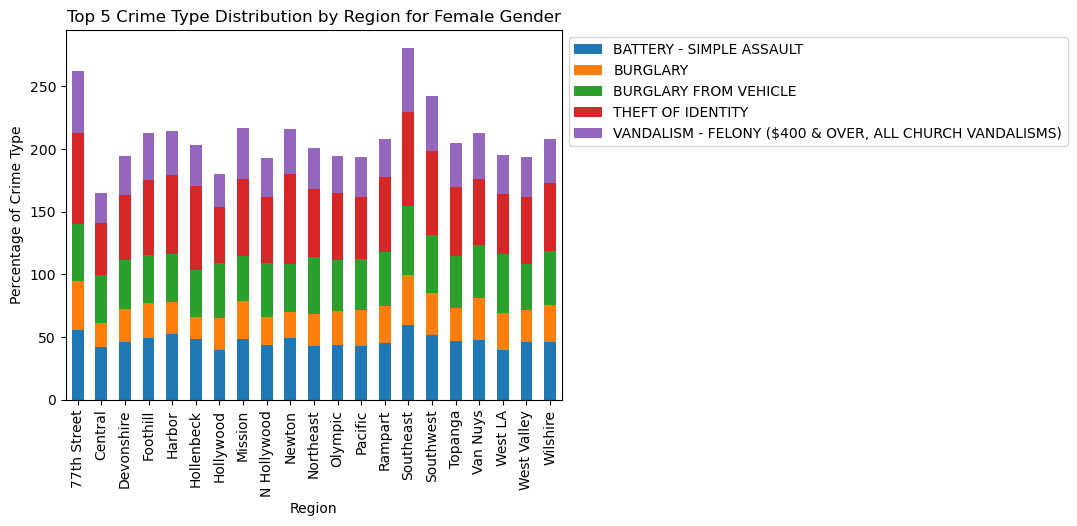

<Figure size 1000x600 with 0 Axes>

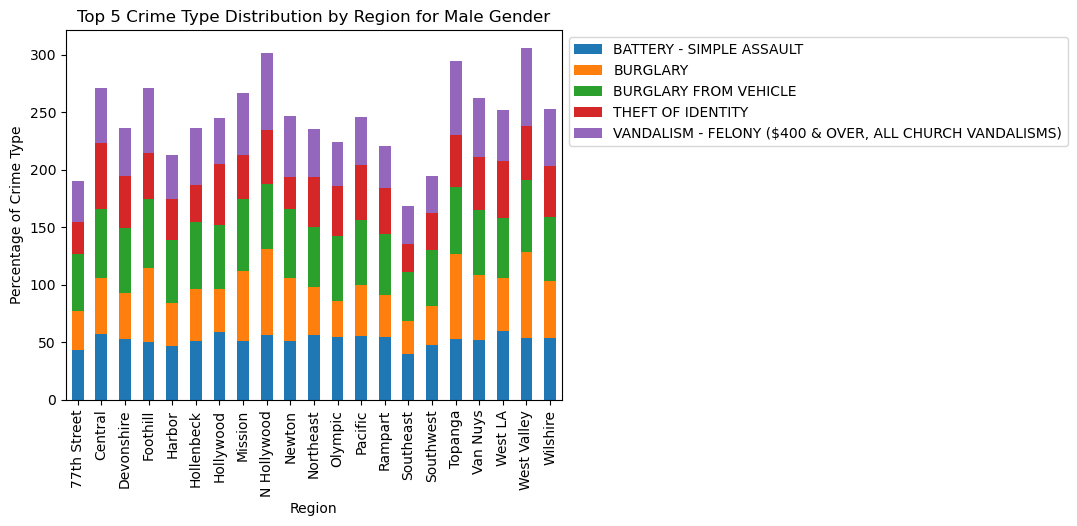

<Figure size 1000x600 with 0 Axes>

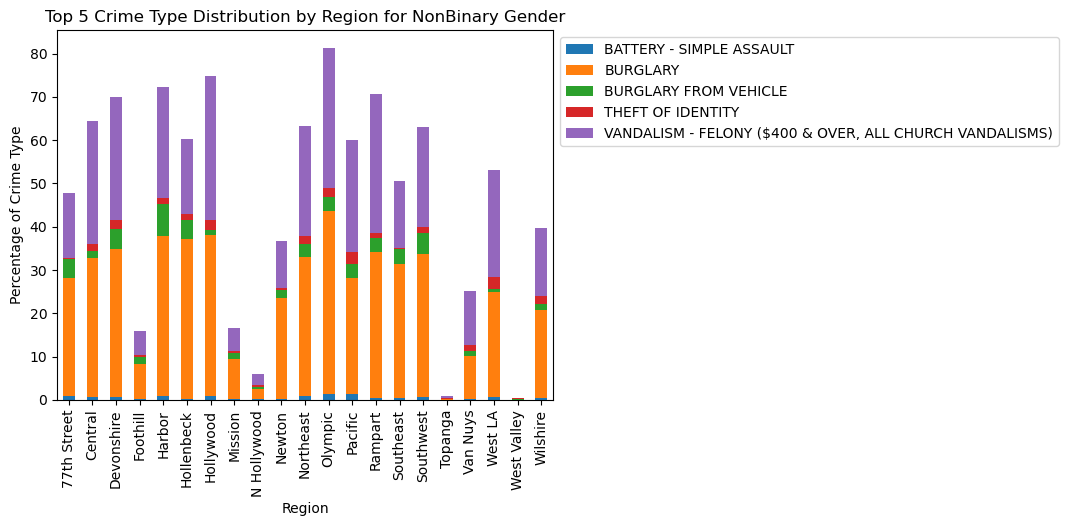

<Figure size 1000x600 with 0 Axes>

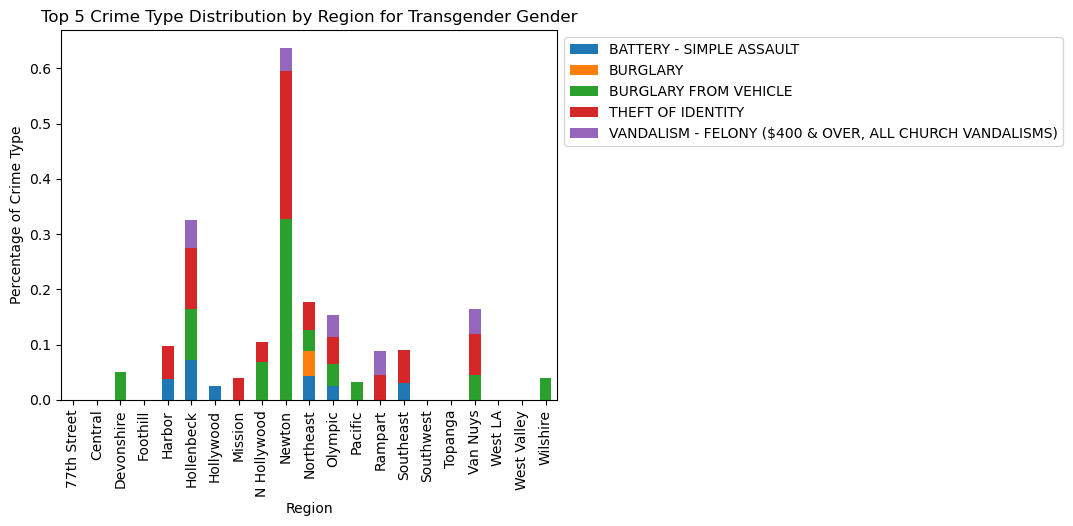

<Figure size 1000x600 with 0 Axes>

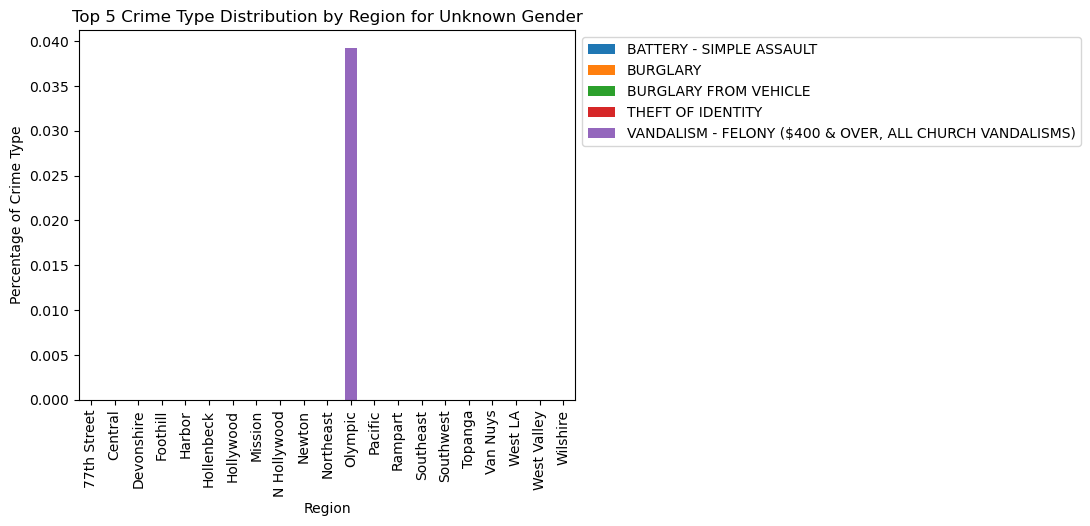

In [30]:
# Creating stacked bar charts to visualize the distribution of the top 5 crime types in different regions, grouped by the gender.

# Get the top 5 crimes by count
top_5_crimes = df['Crm Cd Desc'].value_counts().index.to_list()[:5]

# Filter the crime data to only include the top 5 crimes
df_cleaned_filtered = df[df['Crm Cd Desc'].isin(top_5_crimes)]

# Map gender values to desired names
gender_mapping = {'F': 'Female', 'M': 'Male', 'X': 'NonBinary', 'H': 'Transgender', '-': 'Unknown'}
df_cleaned_filtered['Mapped Gender'] = df_cleaned_filtered['Vict Sex'].map(gender_mapping)

# Group the filtered crime data by region, crime type, and mapped gender
crime_by_region_type_mapped_gender = df_cleaned_filtered.groupby(['AREA NAME', 'Crm Cd Desc', 'Mapped Gender']).size().unstack()

# Calculate the percentage of each crime type in each region and mapped gender
crime_by_region_type_mapped_gender_percent = crime_by_region_type_mapped_gender.div(crime_by_region_type_mapped_gender.sum(axis=1), axis=0) * 100

# Create separate stacked bar charts for each mapped gender
mapped_genders = crime_by_region_type_mapped_gender_percent.columns
for mapped_gender in mapped_genders:
    plt.figure(figsize=(10, 6))
    crime_by_region_type_mapped_gender_percent[mapped_gender].unstack().plot(kind='bar', stacked=True)

    # Set the title and labels of the plot
    plt.title(f'Top 5 Crime Type Distribution by Region for {mapped_gender} Gender')
    plt.xlabel('Region')
    plt.ylabel('Percentage of Crime Type')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # Show the plot
    plt.show()


Observations :
1. Gender Disparities in Crime: Across different areas, there are variations in the gender distribution of individuals involved in different types of crimes. For example, in the "77th Street" area, there is a higher percentage of "Female" involvement in "BATTERY - SIMPLE ASSAULT" compared to "Male" involvement, while the opposite is observed for "BURGLARY FROM VEHICLE."
1. Crime Type Variation: The data shows that different types of crimes have distinct gender distributions. For example, "BURGLARY" typically has a higher percentage of "Male" involvement, while "THEFT OF IDENTITY" tends to have a higher percentage of "Female" involvement.
1. NonBinary Category: The "NonBinary" category, which represents individuals who do not identify strictly as "Male" or "Female," is present in some crime categories but is significantly less represented in most cases.
1. Gender and Vandalism: "VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)" generally has a more balanced distribution between "Male" and "Female" involvement, with smaller percentages for "NonBinary" and "Transgender".
1. Significant Unknown Data: The "Unknown" category is prevalent in most areas and crime categories. This indicates that for a large portion of reported crimes, the gender identity of the individuals involved is not specified or known.

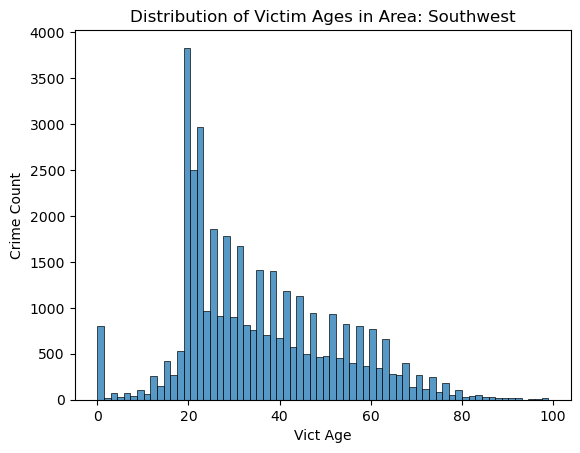

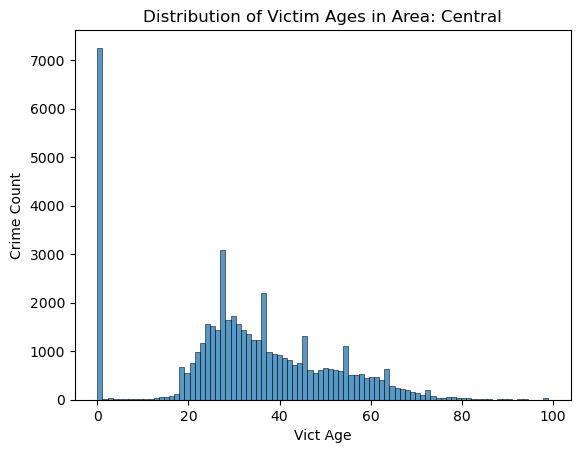

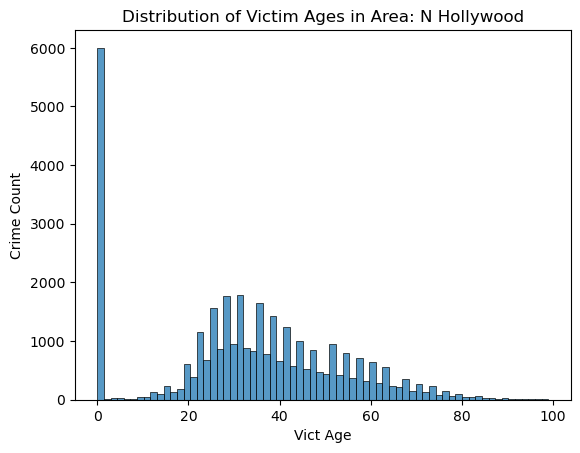

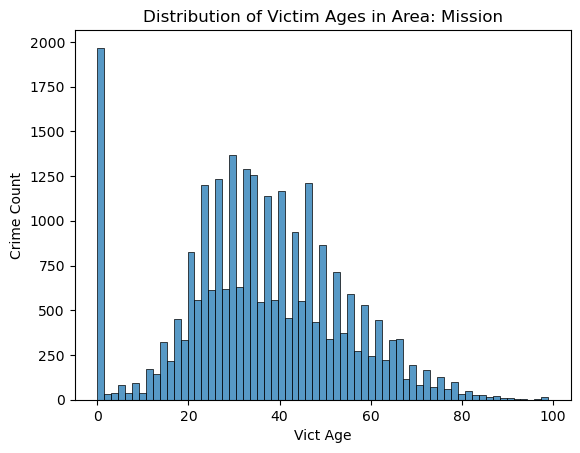

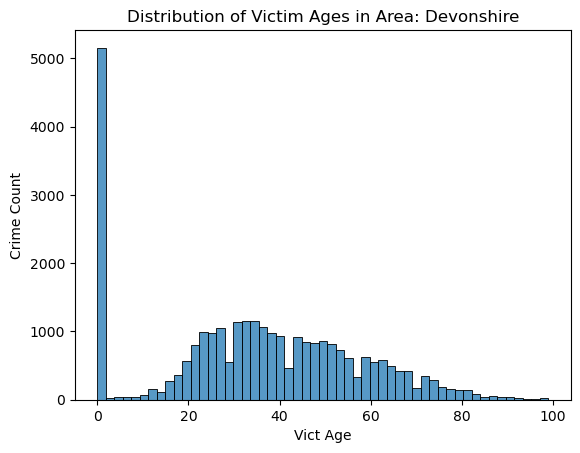

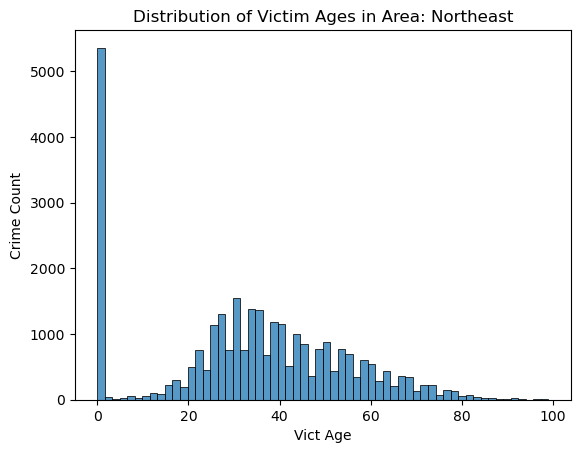

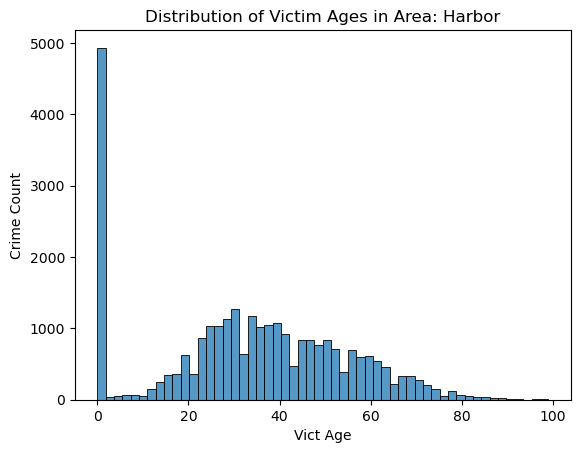

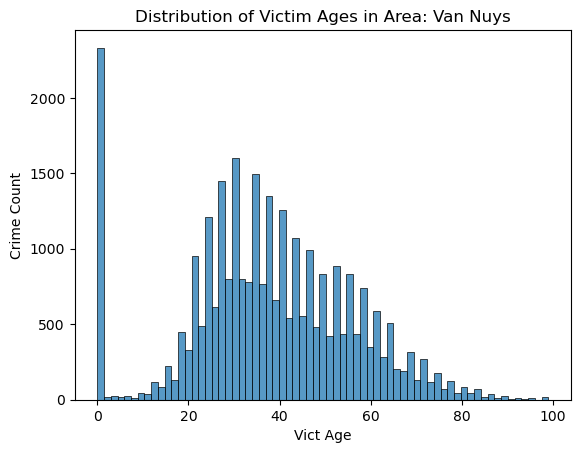

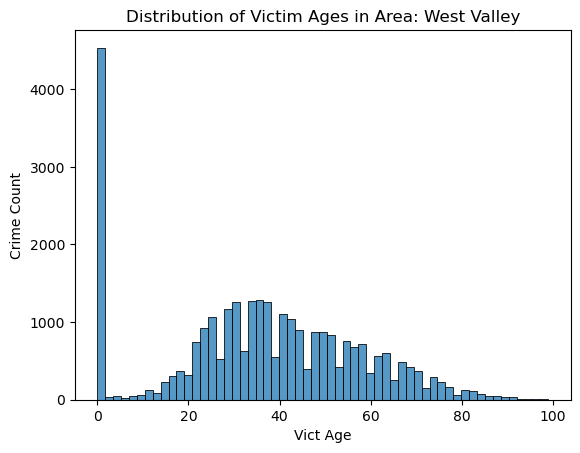

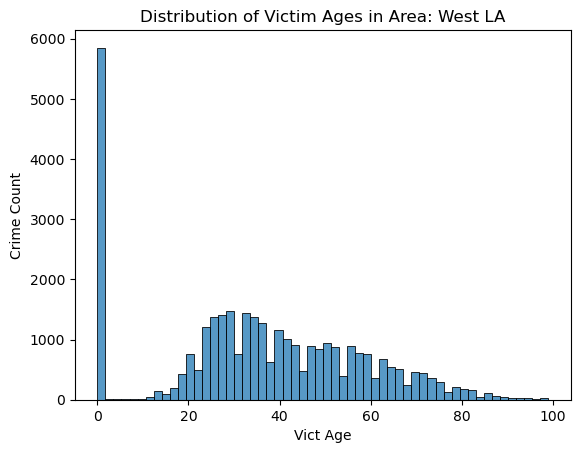

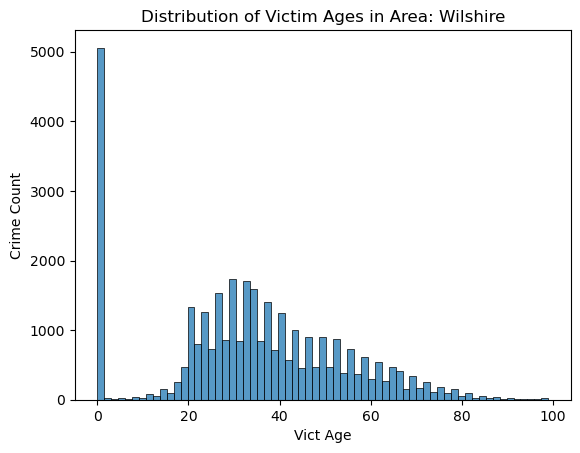

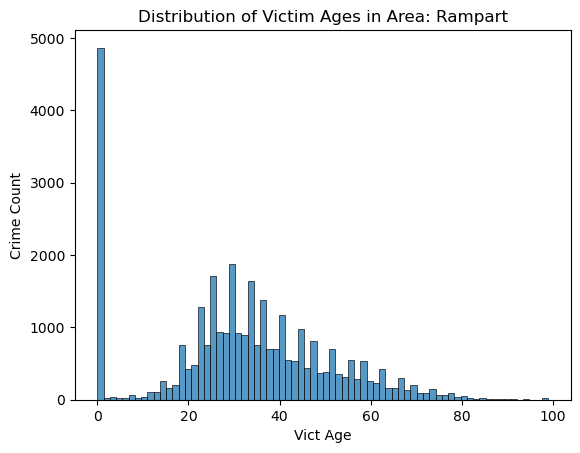

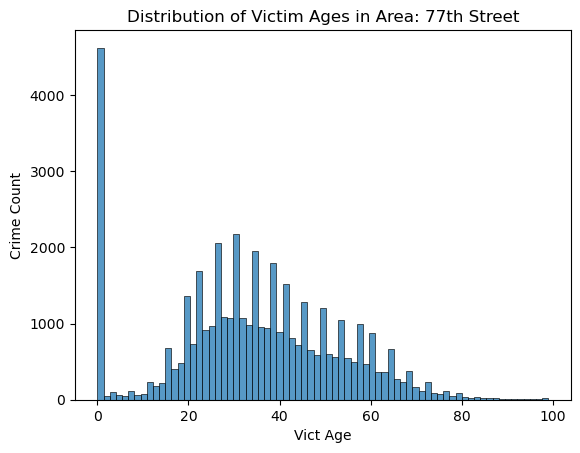

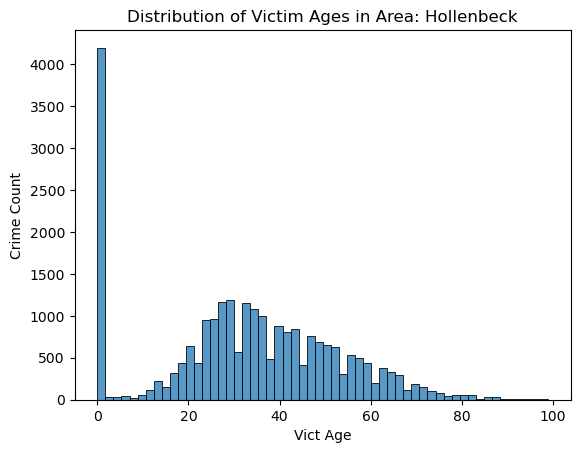

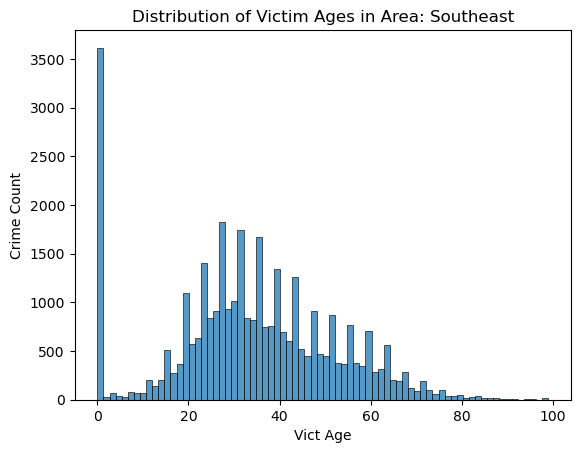

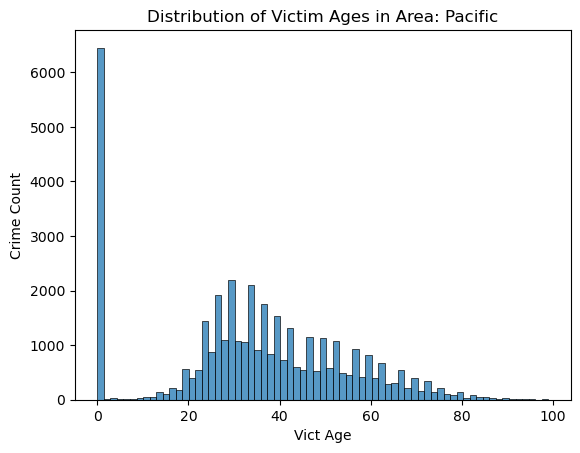

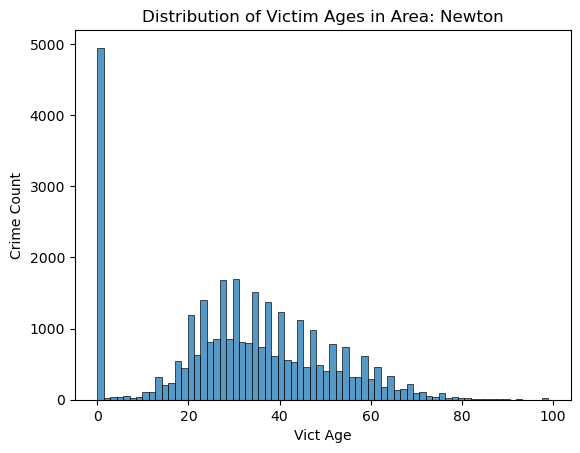

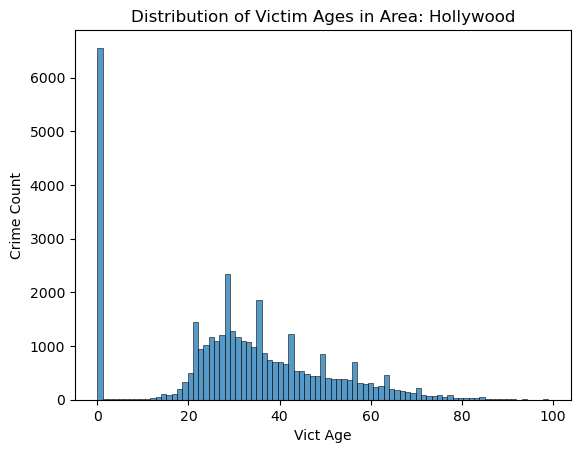

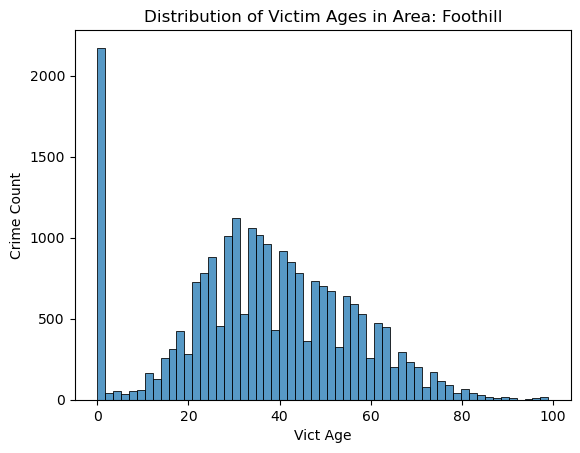

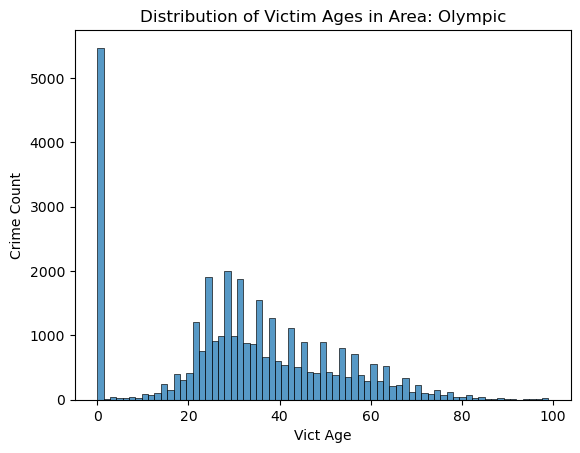

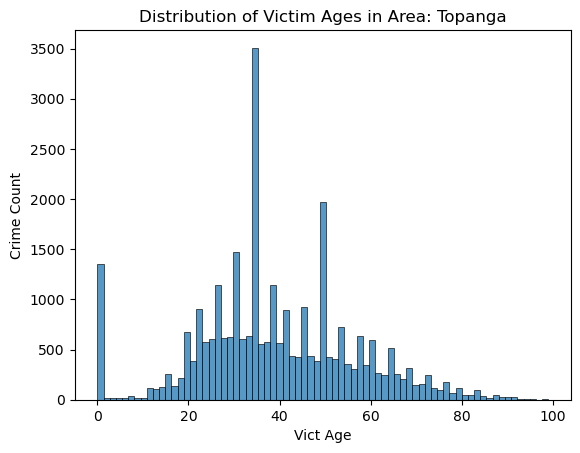

In [31]:
# Creating histograms for the distribution of victim ages in different areas

unique_areas = df['AREA NAME'].unique()

for area in unique_areas:
    area_df = df[df['AREA NAME'] == area]
    ax = sns.histplot(area_df['Vict Age'], kde=False)
    plt.ylabel('Crime Count')
    plt.title(f"Distribution of Victim Ages in Area: {area}")
    plt.show()


Observations :
1. In most of the areas, the age group with the highest count is "0," which may represent an unspecified or unknown age group. This suggests that for many incidents, the age of the victim is not recorded or available.
2. However, in "Southwest" and "Topanga," the age groups with the highest counts are "21" and "35," respectively. This indicates that in these areas, there are significant numbers of incidents or crimes involving individuals in these specific age groups.
3. Some areas have particularly high counts of incidents, such as "Central," "Hollywood," "Pacific," and "West LA." These areas have counts in the range of 5,000 to 7,000 incidents.
4. "Mission" has the lowest count among the listed areas, with only 1,967 incidents recorded for the unspecified age group.

# Correlation with Economic Factors

In [32]:
first_date = pd.to_datetime(df['DATE OCC'].min())
last_date = pd.to_datetime(df['DATE OCC'].max())
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
first_of_month_data = df[df['DATE OCC'].dt.day == 1]
crimes_by_month = df.groupby(['Year','Month'])['DATE OCC'].count()
crimes_by_month.index = list(first_of_month_data['DATE OCC'].drop_duplicates())
crimes_by_month.index.name = 'Date OCC'
first_of_month_data = df[df['DATE OCC'].dt.day == 1]
first_month_data = first_of_month_data[first_of_month_data['DATE OCC'].dt.month == 1]
crimes_by_year = df.groupby(['Year'])['DATE OCC'].count()
crimes_by_year.index = list(first_month_data['DATE OCC'].drop_duplicates())
crimes_by_year.index.name = 'Date OCC'

We are going to test the following economic factors with crime rates in the city:
- Unemployment Rate 
- Poverty Rate
- Gross Domestic Product(GDP)
- Per Capita Personal Income
- Median Household Income
- Income Inequality
- Poverty Gap
- Consumer Price Index
- Inflation Rate
- Housing Price Index
- Housing Affordability Index
- Housing Inventory
- Federal Funds Rates

## Unemployment Rate

In [33]:
df_unemployment = pd.read_csv("UnemploymentData.csv")
# print(df_unemployment)
df_unemployment['DATE'] = pd.to_datetime(df_unemployment['DATE'])
df_unemp_20 = df_unemployment[df_unemployment['DATE']>=first_date]

unemp_crime_merge = pd.merge(df_unemp_20, crimes_by_month, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
unemployment_rate = unemp_crime_merge['CALOSA7URN']
crime_count = unemp_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(unemployment_rate, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Unemployment Rate and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Unemployment Rate and Crime Count in the city.")

Pearson correlation coefficient (r): -0.62
P-value: 0.0000
There is a statistically significant correlation of the Unemployment Rate and Crime Count in the city.


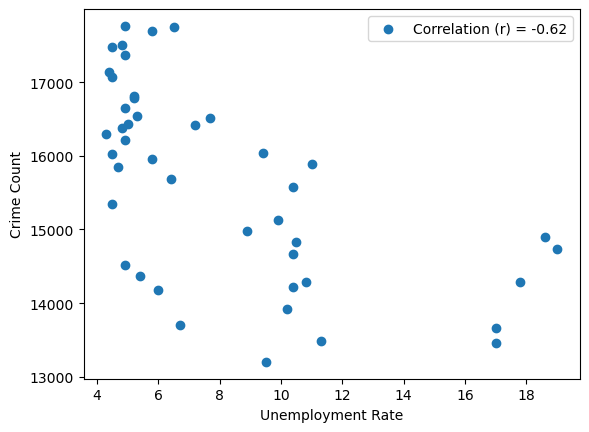

In [34]:
plt.scatter(unemployment_rate, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Unemployment Rate')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Poverty Rate

In [35]:
df_poverty_rate = pd.read_csv("PovertyRate.csv")
df_povertyrate = df_poverty_rate[df_poverty_rate['LOCATION']=='USA'].reset_index(drop=True)
df_povertyrate['TIME'] = df_povertyrate['TIME'].values.astype('str')
df_povertyrate['TIME'] = pd.to_datetime(df_povertyrate['TIME'])
df_povertyrate = df_povertyrate[df_povertyrate['TIME']>=first_date]


povertyrate_crime_merge = pd.merge(df_povertyrate, crimes_by_year, left_on='TIME', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
povertyrate = povertyrate_crime_merge['Value']
crime_count = povertyrate_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(povertyrate, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Poverty Rate and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Poverty Rate and Crime Count in the city.")

Pearson correlation coefficient (r): -1.00
P-value: 1.0000
There is no statistically significant correlation of the Poverty Rate and Crime Count in the city.


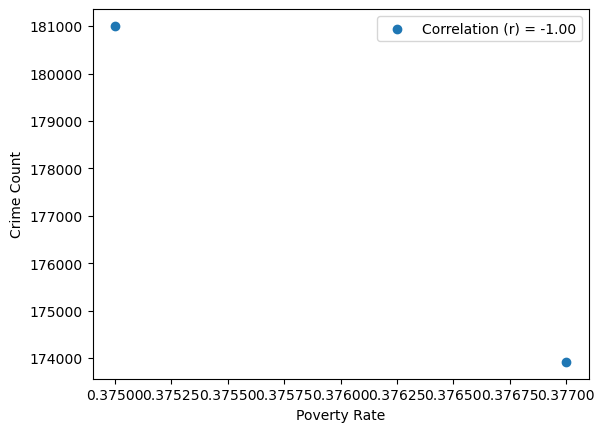

In [36]:
plt.scatter(povertyrate, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Poverty Rate')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Gross Domestic Product

In [37]:
df_GDP = pd.read_csv("TotalGDP.csv")
df_GDP['DATE'] = pd.to_datetime(df_GDP['DATE'])
df_GDP_20 = df_GDP[df_GDP['DATE']>=first_date]


GDP_crime_merge = pd.merge(df_GDP_20, crimes_by_year, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
GDP = GDP_crime_merge['CARGSP']
crime_count = GDP_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(GDP, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the GDP and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the GDP and Crime Count in the city.")

Pearson correlation coefficient (r): 0.74
P-value: 0.4721
There is no statistically significant correlation of the GDP and Crime Count in the city.


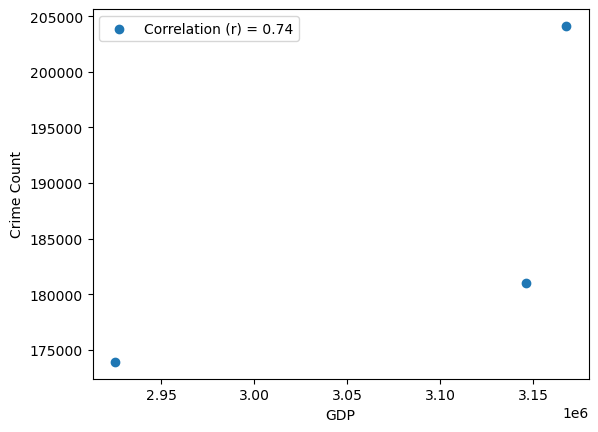

In [38]:
plt.scatter(GDP, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('GDP')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Per Capita Personal Income

In [39]:
df_per_capita_income = pd.read_csv("PerCapitaPersonalIncome.csv")
df_per_capita_income['DATE'] = pd.to_datetime(df_per_capita_income['DATE'])
df_per_capita_income_20 = df_per_capita_income[df_per_capita_income['DATE']>=first_date]


percapitaincome_crime_merge = pd.merge(df_per_capita_income_20, crimes_by_year, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
percapitaincome = percapitaincome_crime_merge['PCPI06037']
crime_count = percapitaincome_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(percapitaincome, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Per Capita Personal Income and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Per Capita Personal Income and Crime Count in the city.")



Pearson correlation coefficient (r): 1.00
P-value: 1.0000
There is no statistically significant correlation of the Per Capita Personal Income and Crime Count in the city.


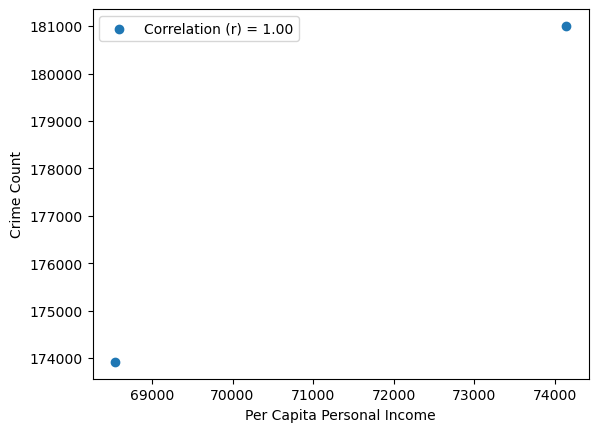

In [40]:
plt.scatter(percapitaincome, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Per Capita Personal Income')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Median Household Income

In [41]:
df_median_household_income = pd.read_csv("MedianHouseholdIncome.csv")
df_median_household_income['DATE'] = pd.to_datetime(df_median_household_income['DATE'])
df_median_household_income_20 = df_median_household_income[df_median_household_income['DATE']>=first_date]
df_median_household_income_20['MHICA06037A052NCEN'] = df_median_household_income_20['MHICA06037A052NCEN'].values.astype('float')


medianhouseholdincome_crime_merge = pd.merge(df_median_household_income_20, crimes_by_year, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
medianhouseholdincome = medianhouseholdincome_crime_merge['MHICA06037A052NCEN']
crime_count = medianhouseholdincome_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(medianhouseholdincome, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Median Household Income and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Median Household Income and Crime Count in the city.")

Pearson correlation coefficient (r): 1.00
P-value: 1.0000
There is no statistically significant correlation of the Median Household Income and Crime Count in the city.


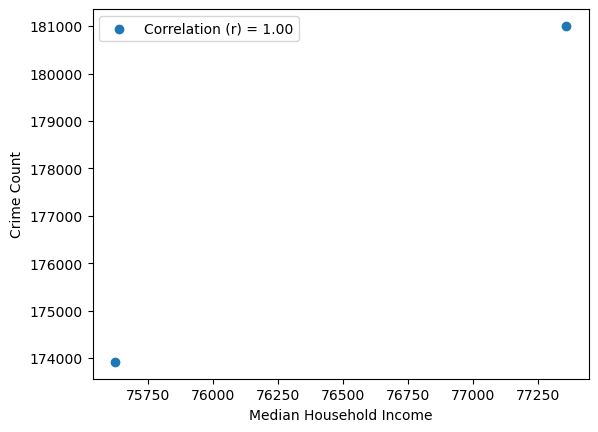

In [42]:
plt.scatter(medianhouseholdincome, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Median Household Income')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Income Inequality

In [43]:
df_income_inequalities = pd.read_csv("IncomeInequality.csv")
df_income_ineq = df_income_inequalities[df_income_inequalities['LOCATION']=='USA'].reset_index(drop=True)
df_income_ineq['TIME'] = df_income_ineq['TIME'].values.astype('str')
df_income_ineq['TIME'] = pd.to_datetime(df_income_ineq['TIME'])
df_income_ineq = df_income_ineq[df_income_ineq['TIME']>=first_date]


income_ineq_crime_merge = pd.merge(df_income_ineq, crimes_by_year, left_on='TIME', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
income_inequality = income_ineq_crime_merge['Value']
crime_count = income_ineq_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(income_inequality, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Income Inequality and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Income Inequality and Crime Count in the city.")

Pearson correlation coefficient (r): -1.00
P-value: 1.0000
There is no statistically significant correlation of the Income Inequality and Crime Count in the city.


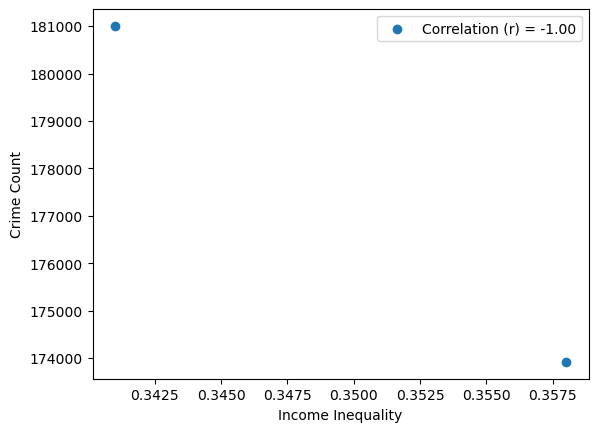

In [44]:
plt.scatter(income_inequality, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Income Inequality')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Poverty Gap

In [45]:
df_poverty_gap = pd.read_csv("PovertyGap.csv")
df_povertygap = df_poverty_gap[df_poverty_gap['LOCATION']=='USA'].reset_index(drop=True)
df_povertygap = df_povertygap.drop_duplicates(subset=['TIME'],keep='last').reset_index(drop=True)
df_povertygap['TIME'] = df_povertygap['TIME'].values.astype('str')
df_povertygap['TIME'] = pd.to_datetime(df_povertygap['TIME'])
df_povertygap = df_povertygap[df_povertygap['TIME']>=first_date]

povertygap_crime_merge = pd.merge(df_povertygap, crimes_by_year, left_on='TIME', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
poverty_gap = povertygap_crime_merge['Value']
crime_count = povertygap_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(poverty_gap, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Poverty Gap and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Poverty Gap and Crime Count in the city.")

Pearson correlation coefficient (r): 1.00
P-value: 1.0000
There is no statistically significant correlation of the Poverty Gap and Crime Count in the city.


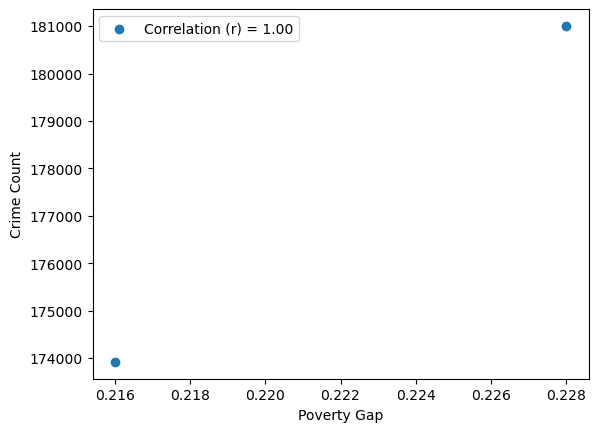

In [46]:
plt.scatter(poverty_gap, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Poverty Gap')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Consumer Price Index

In [47]:
df_CPI = pd.read_csv("CPI2020-Present.csv")
df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])
df_CPI_20 = df_CPI[df_CPI['DATE']>=first_date]


CPI_crime_merge = pd.merge(df_CPI_20, crimes_by_month, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
CPI = CPI_crime_merge['CPI']
crime_count = CPI_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(CPI, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Consumer Price Index and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Consumer Price Index and Crime Count in the city.")



Pearson correlation coefficient (r): 0.62
P-value: 0.0000
There is a statistically significant correlation of the Consumer Price Index and Crime Count in the city.


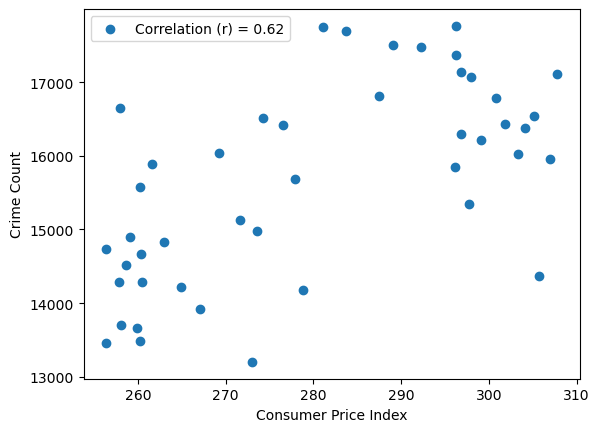

In [48]:
plt.scatter(CPI, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Consumer Price Index')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Inflation Rate

In [49]:
df_Inflation = pd.read_csv("InflationRateUS.csv")
df_Inflation['DATE'] = pd.to_datetime(df_Inflation['DATE'])
df_Inflation_20 = df_Inflation[df_Inflation['DATE']>=first_date]

inflation_crime_merge = pd.merge(df_Inflation_20, crimes_by_month, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
Inflation = inflation_crime_merge['InflationRate']
crime_count = inflation_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(Inflation, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Inflation Rate and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Inflation Rate and Crime Count in the city.")

Pearson correlation coefficient (r): 0.67
P-value: 0.0000
There is a statistically significant correlation of the Inflation Rate and Crime Count in the city.


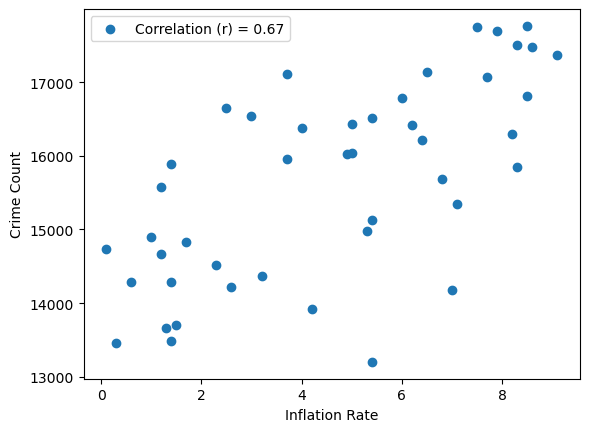

In [50]:
plt.scatter(Inflation, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Inflation Rate')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Housing Market Data

In [51]:
df_Housing_Index = pd.read_csv("HousingPriceIndex.csv")
df_Housing_Index['DATE'] = pd.to_datetime(df_Housing_Index['DATE'])
df_Housing_Index_20 = df_Housing_Index[df_Housing_Index['DATE']>=first_date]


housing_crime_merge = pd.merge(df_Housing_Index_20, crimes_by_year, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
HousingPriceIndex = housing_crime_merge['HousingPriceIndex']
crime_count = housing_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(HousingPriceIndex, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Housing Price Index and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Housing Price Index and Crime Count in the city.")

Pearson correlation coefficient (r): 0.98
P-value: 0.1194
There is no statistically significant correlation of the Housing Price Index and Crime Count in the city.


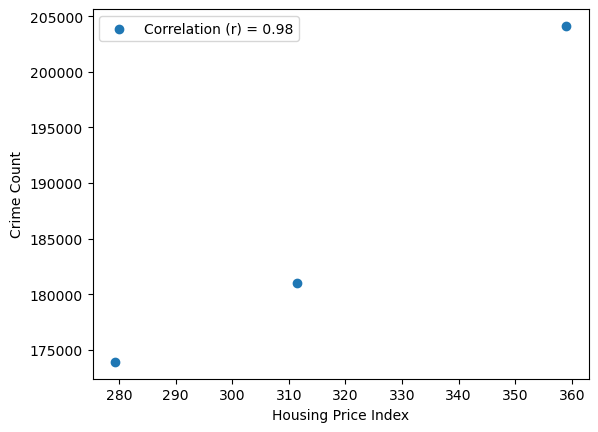

In [52]:
plt.scatter(HousingPriceIndex, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Housing Price Index')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

In [53]:
AffordabilityIndex = housing_crime_merge['Affordability Index']
crime_count = housing_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(HousingPriceIndex, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Housing Affordability Index and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Housing Affordability Index and Crime Count in the city.")

Pearson correlation coefficient (r): 0.98
P-value: 0.1194
There is no statistically significant correlation of the Housing Affordability Index and Crime Count in the city.


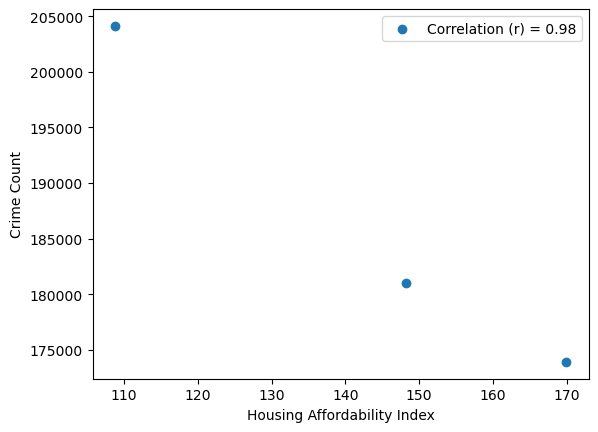

In [54]:
plt.scatter(AffordabilityIndex, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Housing Affordability Index')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Housing Inventory

In [55]:
df_Housing_Inventory = pd.read_csv("HousingInventory.csv")
df_Housing_Inventory['DATE'] = pd.to_datetime(df_Housing_Inventory['DATE'])
df_Housing_Inventory_20 = df_Housing_Inventory[df_Housing_Inventory['DATE']>=first_date]

housing_inven_crime_merge = pd.merge(df_Housing_Inventory_20, crimes_by_month, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
HousingInventory = housing_inven_crime_merge['ACTLISCOU6037']
crime_count = housing_inven_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(HousingInventory, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Housing Inventory and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Housing Inventory and Crime Count in the city.")

Pearson correlation coefficient (r): -0.28
P-value: 0.0608
There is no statistically significant correlation of the Housing Inventory and Crime Count in the city.


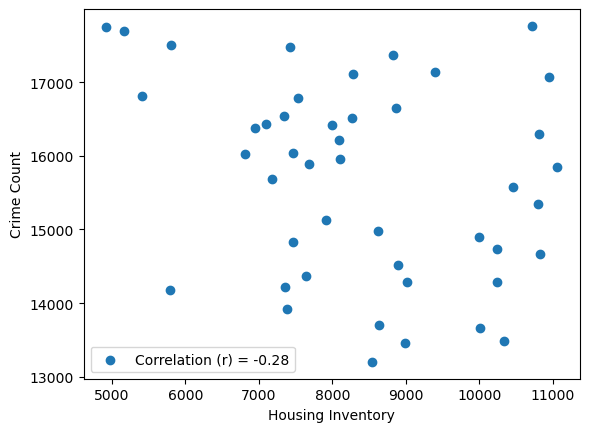

In [56]:
plt.scatter(HousingInventory, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Housing Inventory')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

## Interest Rates

In [57]:
df_interest_rates = pd.read_csv("InterestRates.csv")
df_interest_rates['DATE'] = pd.to_datetime(df_interest_rates['DATE'])
df_interest_rates_20 = df_interest_rates[df_interest_rates['DATE']>=first_date]

interestrate_crime_merge = pd.merge(df_interest_rates_20, crimes_by_month, left_on='DATE', right_on='Date OCC', how='inner')

# Sample data for economic factors and crime rates
Interest_rate = interestrate_crime_merge['FEDFUNDS']
crime_count = interestrate_crime_merge['DATE OCC']

# Calculate the Pearson correlation coefficient (r) and p-value
r, p_value = stats.pearsonr(Interest_rate, crime_count)

# Output the results
print(f"Pearson correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

# Set your significance level (alpha)
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print("There is a statistically significant correlation of the Interest Rate and Crime Count in the city.")
else:
    print("There is no statistically significant correlation of the Interest Rate and Crime Count in the city.")

Pearson correlation coefficient (r): 0.34
P-value: 0.0208
There is a statistically significant correlation of the Interest Rate and Crime Count in the city.


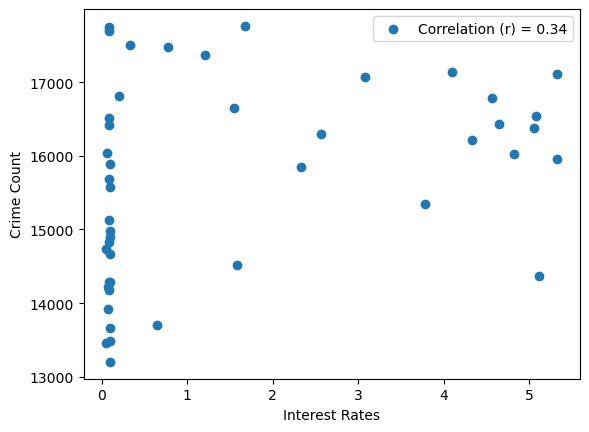

In [58]:
plt.scatter(Interest_rate, crime_count, label=f'Correlation (r) = {r:.2f}')

# Add labels and a legend
plt.xlabel('Interest Rates')
plt.ylabel('Crime Count')
plt.legend()

# Show the plot
plt.show()

Analysis:

Correlation of economic factors with crime rates in the city:
- Unemployment Rate : There is a statistically significant correlation of the Unemployment Rate and Crime Count in the city.
- Poverty Rate: There is no statistically significant correlation of the Poverty Rate and Crime Count in the city.
- Gross Domestic Product(GDP): There is no statistically significant correlation of the GDP and Crime Count in the city.
- Per Capita Personal Income: There is no statistically significant correlation of the Per Capita Personal Income and Crime Count in the city.
- Median Household Income: There is no statistically significant correlation of the Median Household Income and Crime Count in the city.
- Income Inequality: There is no statistically significant correlation of the Income Inequality and Crime Count in the city.
- Poverty Gap: There is no statistically significant correlation of the Poverty Gap and Crime Count in the city.
- Consumer Price Index: There is a statistically significant correlation of the Consumer Price Index and Crime Count in the city.
- Inflation Rate: There is a statistically significant correlation of the Inflation Rate and Crime Count in the city.
- Housing Price Index: There is no statistically significant correlation of the Housing Price Index and Crime Count in the city.
- Housing Affordability Index: There is no statistically significant correlation of the Housing Affordability Index and Crime Count in the city.
- Housing Inventory: There is no statistically significant correlation of the Housing Inventory and Crime Count in the city.
- Federal Funds Rates: There is a statistically significant correlation of the Interest Rate and Crime Count in the city.

# Day of the Week Analysis

## Day Reported 

In [59]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['Date Rptd Day'] = df['Date Rptd'].dt.day_name()

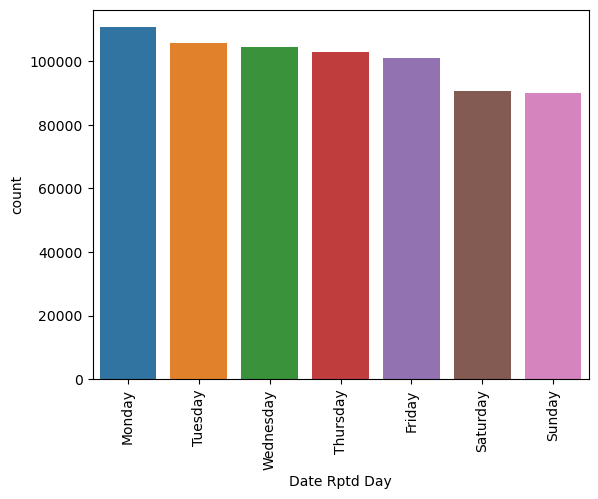

In [60]:
group = df.groupby('Date Rptd Day').size()
ax = sns.countplot(x="Date Rptd Day", data=df,order = df['Date Rptd Day'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [61]:
bins = [0, 20, 30, 40, 50, 60,100]
labels = ['under 20', '21-30', '31-40', '41-50', '51-60', '60+']
df['Age Group'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)

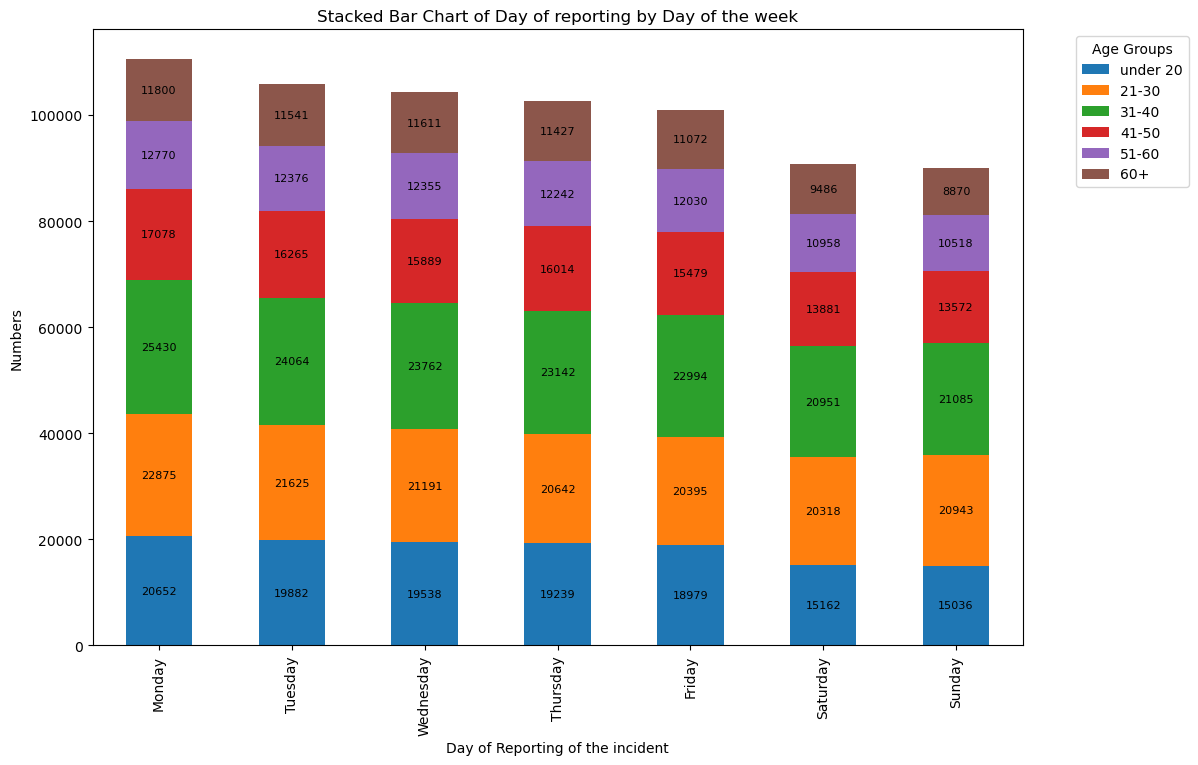

In [62]:
# Create a DataFrame with counts of 'Age Group' values for each 'Date Rptd Day'
age_group_counts = df.groupby(['Date Rptd Day', 'Age Group']).size().unstack(fill_value=0)

# Calculate the total count of 'Date Rptd' for each day
total_date_rptd_count = df['Date Rptd Day'].value_counts()

# Define a custom sorting order based on the total count of 'Date Rptd'
custom_order = total_date_rptd_count.index

# Reorder the index of the age_group_counts DataFrame based on the custom sorting order
age_group_counts = age_group_counts.reindex(custom_order)

# Plot a stacked bar chart
ax = age_group_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

ax.set_xlabel('Day of Reporting of the incident')
ax.set_ylabel('Numbers')
ax.set_title('Stacked Bar Chart of Day of reporting by Day of the week')

# Add a legend for age groups
custom_labels = list(age_group_counts.columns)
ax.legend(custom_labels, title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the counts of each age group
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black', labels=[str(int(val)) if val != 0 else '' for val in container.datavalues])

plt.xticks(rotation=90)
plt.show()


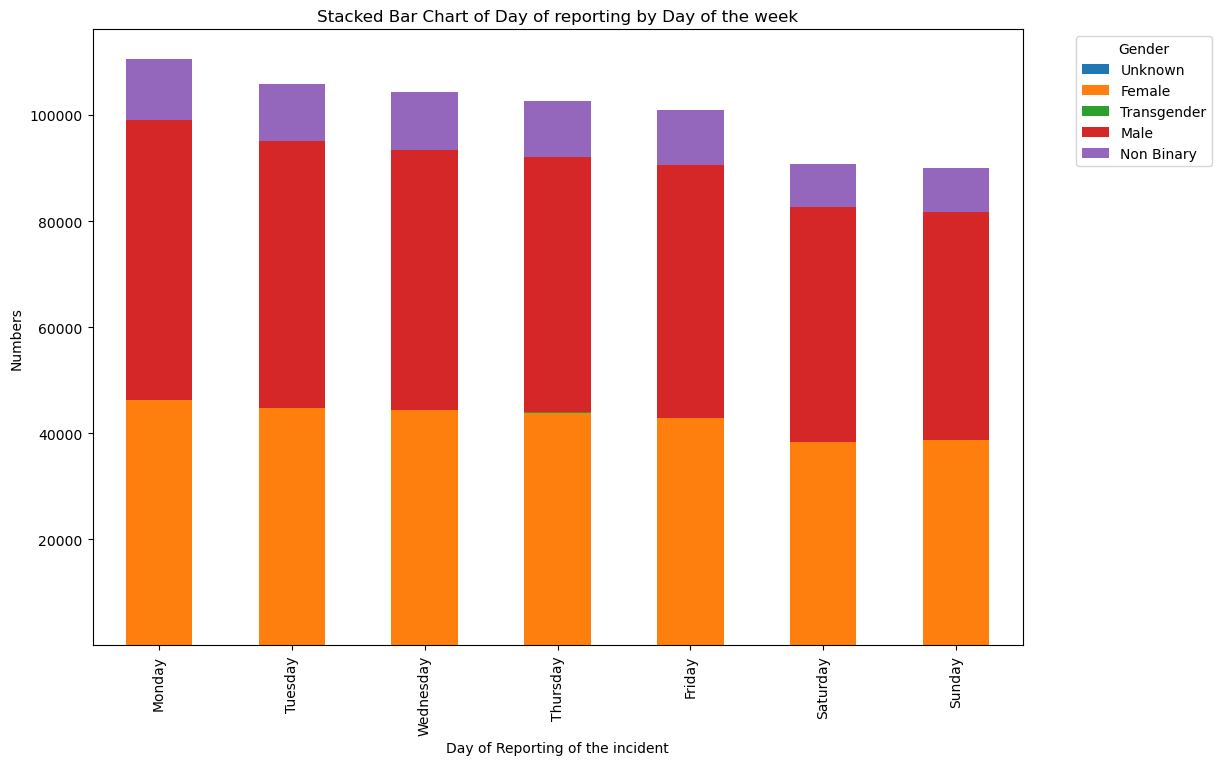

In [63]:
# Create a DataFrame with counts of 'Vict Sex' values for each 'Date Rptd Day'
gender_counts = df.groupby(['Date Rptd Day', 'Vict Sex']).size().unstack(fill_value=0)

# Calculate the total count of 'Date Rptd' for each day
total_date_rptd_count = df['Date Rptd Day'].value_counts()

# Define a custom sorting order based on the total count of 'Date Rptd'
custom_order = total_date_rptd_count.index

# Reorder the index of the gender_counts DataFrame based on the custom sorting order
gender_counts = gender_counts.reindex(custom_order)

# Plot a stacked bar chart
ax = gender_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

ax.set_xlabel('Day of Reporting of the incident')
ax.set_ylabel('Numbers')
ax.set_title('Stacked Bar Chart of Day of reporting by Day of the week')
# Add a legend for gender
custom_labels = ['Unknown','Female','Transgender','Male','Non Binary']
ax.legend(custom_labels, title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=90)
plt.show()

## Day of Incident

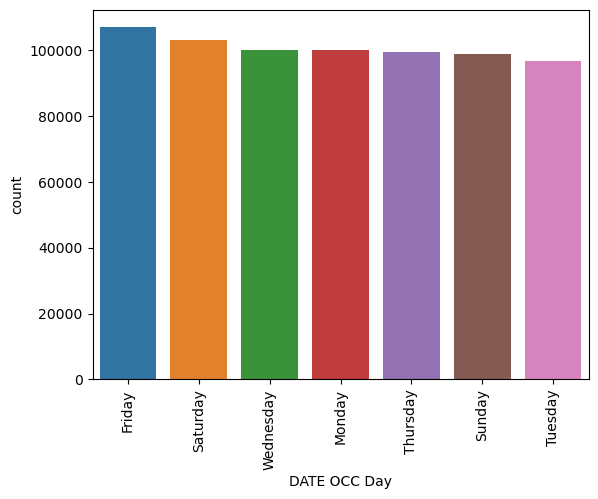

In [64]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['DATE OCC Day'] = df['DATE OCC'].dt.day_name()

group = df.groupby('DATE OCC Day').size()
ax = sns.countplot(x="DATE OCC Day", data=df,order = df['DATE OCC Day'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

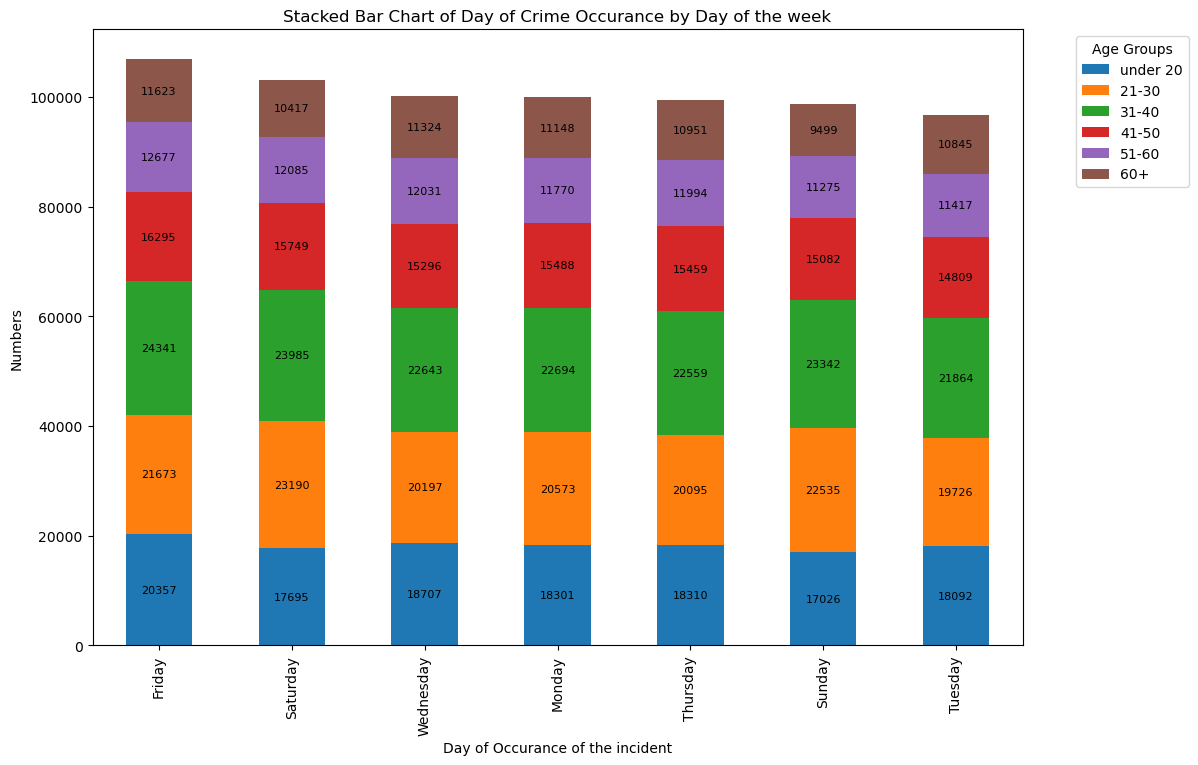

In [65]:
# Create a DataFrame with counts of 'Age Group' values for each 'Date Rptd Day'
age_group_counts = df.groupby(['DATE OCC Day', 'Age Group']).size().unstack(fill_value=0)

# Calculate the total count of 'Date Rptd' for each day
total_date_rptd_count = df['DATE OCC Day'].value_counts()

# Define a custom sorting order based on the total count of 'Date Rptd'
custom_order = total_date_rptd_count.index

# Reorder the index of the age_group_counts DataFrame based on the custom sorting order
age_group_counts = age_group_counts.reindex(custom_order)

# Plot a stacked bar chart
ax = age_group_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

ax.set_xlabel('Day of Occurance of the incident')
ax.set_ylabel('Numbers')
ax.set_title('Stacked Bar Chart of Day of Crime Occurance by Day of the week')

# Add a legend for age groups
custom_labels = list(age_group_counts.columns)
ax.legend(custom_labels, title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the counts of each age group
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black', labels=[str(int(val)) if val != 0 else '' for val in container.datavalues])

plt.xticks(rotation=90)
plt.show()


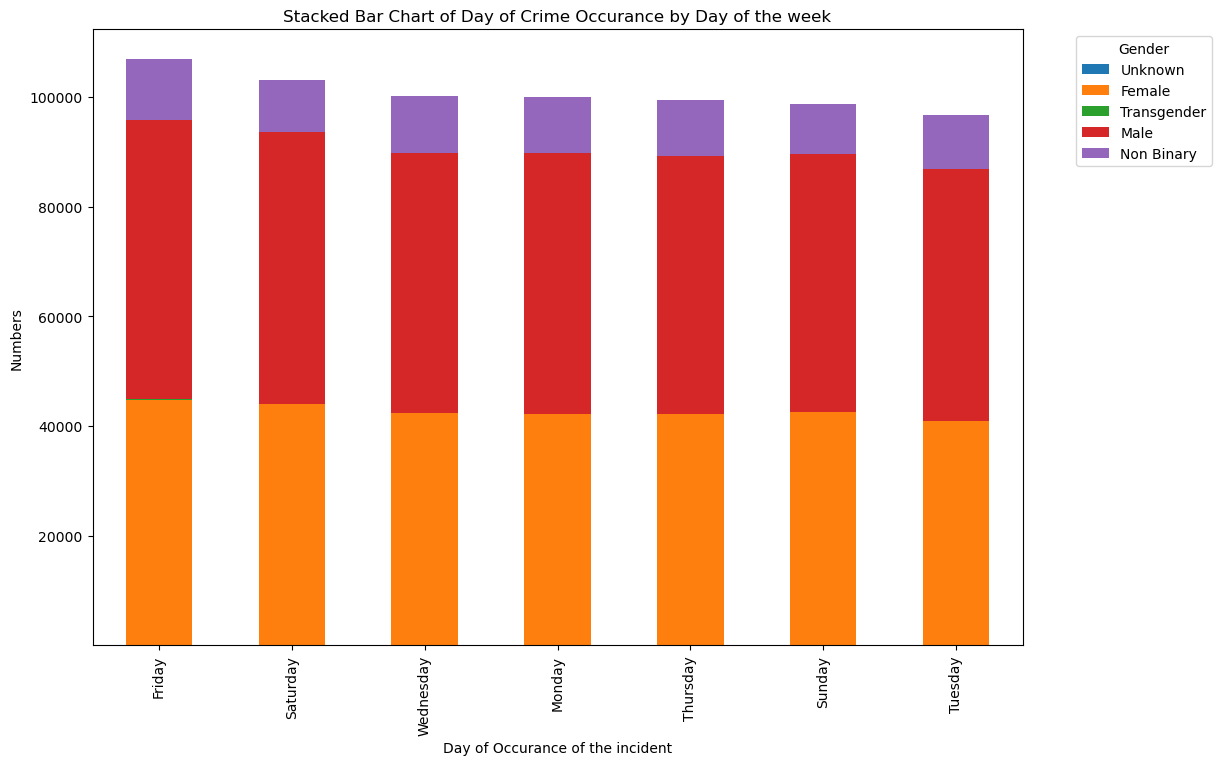

In [66]:
# Create a DataFrame with counts of 'Vict Sex' values for each 'Date Rptd Day'
gender_counts = df.groupby(['DATE OCC Day', 'Vict Sex']).size().unstack(fill_value=0)

# Calculate the total count of 'Date Rptd' for each day
total_date_rptd_count = df['DATE OCC Day'].value_counts()

# Define a custom sorting order based on the total count of 'Date Rptd'
custom_order = total_date_rptd_count.index

# Reorder the index of the gender_counts DataFrame based on the custom sorting order
gender_counts = gender_counts.reindex(custom_order)

# Plot a stacked bar chart
ax = gender_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

ax.set_xlabel('Day of Occurance of the incident')
ax.set_ylabel('Numbers')
ax.set_title('Stacked Bar Chart of Day of Crime Occurance by Day of the week')

# Add a legend for gender
custom_labels = ['Unknown','Female','Transgender','Male','Non Binary']
ax.legend(custom_labels, title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=90)
plt.show()

# Impact of Major Events

##### The major events observed during this time period are - George Loyyd incident, December Holiday period (for three years 2020 , 2021 & 2022), US Presidential election 2020 results, White House attack (January 6, 2021-defeat of U.S. president Donald Trump), COVID-19

In [67]:
df['Day'] = df['DATE OCC'].dt.day
df['Date'] = df['DATE OCC'].dt.date

In [68]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'LAT', 'LON',
       'Vict Sex Encoded', 'Vict Descent Encoded', 'Year', 'Month',
       'Date Rptd Day', 'Age Group', 'DATE OCC Day', 'Day', 'Date'],
      dtype='object')

In [69]:
year_2020 = df[df['Year'] == 2020]
year_2021 = df[df['Year'] == 2021]
year_2022 = df[df['Year'] == 2022]
year_2023 = df[df['Year'] == 2023]

##### COVID-19

In [70]:
#COVID
covid_b = year_2020[(year_2020['Month'] == 1) | (year_2020['Month'] == 2) | (year_2020['Month'] == 3) | (year_2020['Month'] == 4) | (year_2020['Month'] == 5) | (year_2020['Month'] == 6)]
covid_a = year_2023[(year_2020['Month'] == 1) | (year_2023['Month'] == 2) | (year_2023['Month'] == 3) | (year_2023['Month'] == 4) | (year_2023['Month'] == 5) | (year_2023['Month'] == 6)]

In [71]:
counts_b = covid_b.groupby(['Month', 'Day']).size()
counts_a = covid_a.groupby(['Month', 'Day']).size()
smean1 = counts_b.mean()
smean2 = counts_a.mean()
sstd1 = counts_b.std()
sstd2 = counts_a.std()
n1 = counts_b.shape[0]
n2 = counts_a.shape[0]


alpha = 0.05  # Significance level

# Calculate the t-statistic and degrees of freedom
t = (smean1 - smean2) / math.sqrt((sstd1**2 / n1) + (sstd2**2 / n2))
dfree = ((sstd1**2 / n1 + sstd2**2 / n2)**2) / (((sstd1**2 / n1)**2 / (n1 - 1)) + ((sstd2**2 / n2)**2 / (n2 - 1)))

# Calculate the critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha/2, dfree)

# Decision
if abs(t) > t_critical:
    result = {
        "decision": "Reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is a significant difference in the number of crimes happened before and after COVID lockdown."
    }
else:
    result = {
        "decision": "Do not reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is no significant difference in the number of crimes happened before and after COVID lockdown."
    }

# Output the result
print(result)

{'decision': 'Reject the null hypothesis', 't': -5.764610801120296, 't_critical': 1.967941397532683, 'interpretation': 'There is a significant difference in the number of crimes happened before and after COVID lockdown.'}


##### Checking for the incident George Loyyd

In [72]:
#george loyyd
gl_b = year_2020[(year_2020['Month'] == 3) | (year_2020['Month'] == 4) | ((year_2020['Month'] == 5) & (year_2020['Day'] < 22))]
gl_a = year_2020[(year_2020['Month'] == 6) | (year_2020['Month'] == 7) | ((year_2020['Month'] == 5) & (year_2020['Day'] > 22))]

In [73]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

counts_b = gl_b.groupby(['Month', 'Day']).size()
counts_a = gl_a.groupby(['Month', 'Day']).size()
smean1 = counts_b.mean()
smean2 = counts_a.mean()
sstd1 = counts_b.std()
sstd2 = counts_a.std()
n1 = counts_b.shape[0]
n2 = counts_a.shape[0]


alpha = 0.05  # Significance level

# Calculate the t-statistic and degrees of freedom
t = (smean1 - smean2) / math.sqrt((sstd1**2 / n1) + (sstd2**2 / n2))
dfree = ((sstd1**2 / n1 + sstd2**2 / n2)**2) / (((sstd1**2 / n1)**2 / (n1 - 1)) + ((sstd2**2 / n2)**2 / (n2 - 1)))

# Calculate the critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha/2, dfree)

# Decision
if abs(t) > t_critical:
    result = {
        "decision": "Reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is a significant difference in the number of crimes happened before and after the event."
    }
else:
    result = {
        "decision": "Do not reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is no significant difference in the number of crimes happened before and after the event."
    }

# Output the result
print(result)

{'decision': 'Reject the null hypothesis', 't': -2.7067865750390085, 't_critical': 1.9781494679627345, 'interpretation': 'There is a significant difference in the number of crimes happened before and after the event.'}


##### Checking Christmas time - December month 2020

In [74]:
# December 2020 - holiday time
dec_2020 = year_2020[(year_2020['Month'] == 12)]
dec_before_after_2020 = df[(((df['Year'] == 2020) & ((df['Month'] == 11) | (df['Month'] == 10)))) | (((df['Year'] == 2021) & ((df['Month'] == 1) | (df['Month'] == 2))))  ]

In [75]:
counts_ba_dec = dec_before_after_2020.groupby(['Month', 'Day']).size()
counts_dec = dec_2020.groupby(['Month', 'Day']).size()
smean1 = counts_ba_dec.mean()
smean2 = counts_dec.mean()
sstd1 = counts_ba_dec.std()
sstd2 = counts_dec.std()
n1 = counts_ba_dec.shape[0]
n2 = counts_dec.shape[0]


alpha = 0.05  # Significance level

# Calculate the t-statistic and degrees of freedom
t = (smean1 - smean2) / math.sqrt((sstd1**2 / n1) + (sstd2**2 / n2))
dfree = ((sstd1**2 / n1 + sstd2**2 / n2)**2) / (((sstd1**2 / n1)**2 / (n1 - 1)) + ((sstd2**2 / n2)**2 / (n2 - 1)))

# Calculate the critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha/2, dfree)

# Decision
if abs(t) > t_critical:
    result = {
        "decision": "Reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is a significant difference in the number of crimes happened in december 2020."
    }
else:
    result = {
        "decision": "Do not reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is no significant difference in the number of crimes happened in december 2020."
    }

# Output the result
print(result)

{'decision': 'Do not reject the null hypothesis', 't': 1.9691494648120773, 't_critical': 2.0010193990127445, 'interpretation': 'There is no significant difference in the number of crimes happened in december 2020.'}


##### Checking Christmas time - December month 2021

In [76]:
# December 2021 - holiday time
dec_2021 = year_2021[(year_2021['Month'] == 12)]
dec_before_after_2021 = df[(((df['Year'] == 2021) & ((df['Month'] == 11) | (df['Month'] == 10)))) | (((df['Year'] == 2022) & ((df['Month'] == 1) | (df['Month'] == 2))))]

In [77]:
counts_ba_dec = dec_before_after_2021.groupby(['Month', 'Day']).size()
counts_dec = dec_2021.groupby(['Month', 'Day']).size()
smean1 = counts_ba_dec.mean()
smean2 = counts_dec.mean()
sstd1 = counts_ba_dec.std()
sstd2 = counts_dec.std()
n1 = counts_ba_dec.shape[0]
n2 = counts_dec.shape[0]


alpha = 0.05  # Significance level
#print(smean1,smean2,sstd1,sstd2,n1,n2)

# Calculate the t-statistic and degrees of freedom
t = (smean1 - smean2) / math.sqrt((sstd1**2 / n1) + (sstd2**2 / n2))
dfree = ((sstd1**2 / n1 + sstd2**2 / n2)**2) / (((sstd1**2 / n1)**2 / (n1 - 1)) + ((sstd2**2 / n2)**2 / (n2 - 1)))

# Calculate the critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha/2, dfree)

# Decision
if abs(t) > t_critical:
    result = {
        "decision": "Reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is a significant difference in the number of crimes happened in december 2021."
    }
else:
    result = {
        "decision": "Do not reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is no significant difference in the number of crimes happened in december 2021."
    }

# Output the result
print(result)

{'decision': 'Reject the null hypothesis', 't': 2.877135843293537, 't_critical': 2.011002304487516, 'interpretation': 'There is a significant difference in the number of crimes happened in december 2021.'}


##### Checking Christmas time - December month 2022

In [78]:
# December 2022 - holiday time
dec_2022 = year_2022[(year_2022['Month'] == 12)]
dec_before_after_2022 = df[(((df['Year'] == 2022) & ((df['Month'] == 11) | (df['Month'] == 10)))) | (((df['Year'] == 2023) & ((df['Month'] == 1) | (df['Month'] == 2))))  ]

In [79]:
counts_ba_dec = dec_before_after_2022.groupby(['Month', 'Day']).size()
counts_dec = dec_2022.groupby(['Month', 'Day']).size()
smean1 = counts_ba_dec.mean()
smean2 = counts_dec.mean()
sstd1 = counts_ba_dec.std()
sstd2 = counts_dec.std()
n1 = counts_ba_dec.shape[0]
n2 = counts_dec.shape[0]


alpha = 0.05  # Significance level
#print(smean1,smean2,sstd1,sstd2,n1,n2)

# Calculate the t-statistic and degrees of freedom
t = (smean1 - smean2) / math.sqrt((sstd1**2 / n1) + (sstd2**2 / n2))
dfree = ((sstd1**2 / n1 + sstd2**2 / n2)**2) / (((sstd1**2 / n1)**2 / (n1 - 1)) + ((sstd2**2 / n2)**2 / (n2 - 1)))

# Calculate the critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha/2, dfree)

# Decision
if abs(t) > t_critical:
    result = {
        "decision": "Reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is a significant difference in the number of crimes happened in december 2022."
    }
else:
    result = {
        "decision": "Do not reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is no significant difference in the number of crimes happened in december 2022."
    }

# Output the result
print(result)

{'decision': 'Do not reject the null hypothesis', 't': -0.21906521593020195, 't_critical': 2.0202078570111897, 'interpretation': 'There is no significant difference in the number of crimes happened in december 2022.'}


##### White house attack - January 6, 2021 (defeat of U.S. president Donald Trump)

In [80]:
wha_b = df[(((df['Year'] == 2020) & ((df['Month'] == 12) | (df['Month'] == 11)))) | ((df['Year'] == 2021) & ((df['Month'] == 1) & (year_2021['Day'] < 6)))]
wha_a = year_2021[(year_2021['Month'] == 3) | (year_2021['Month'] == 2) | ((year_2021['Month'] == 1) & (year_2021['Day'] >= 6))]

In [81]:
counts_wha_b = wha_b.groupby(['Month', 'Day']).size()
counts_wha_a = wha_a.groupby(['Month', 'Day']).size()
smean1 = counts_wha_b.mean()
smean2 = counts_wha_a.mean()
sstd1 = counts_wha_b.std()
sstd2 = counts_wha_a.std()
n1 = counts_wha_b.shape[0]
n2 = counts_wha_a.shape[0]


alpha = 0.05  # Significance level

# Calculate the t-statistic and degrees of freedom
t = (smean1 - smean2) / math.sqrt((sstd1**2 / n1) + (sstd2**2 / n2))
dfree = ((sstd1**2 / n1 + sstd2**2 / n2)**2) / (((sstd1**2 / n1)**2 / (n1 - 1)) + ((sstd2**2 / n2)**2 / (n2 - 1)))

# Calculate the critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha/2, dfree)

# Decision
if abs(t) > t_critical:
    result = {
        "decision": "Reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is a significant difference in the number of crimes happened before and after the White house attack event."
    }
else:
    result = {
        "decision": "Do not reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is no significant difference in the number of crimes happened before and after the White house attack  event."
    }

# Output the result
print(result)

{'decision': 'Do not reject the null hypothesis', 't': -1.15036495277525, 't_critical': 1.9844767511840258, 'interpretation': 'There is no significant difference in the number of crimes happened before and after the White house attack  event.'}


##### US election result - November 3, 2020

In [82]:
use_a = df[(((df['Year'] == 2020) & ((df['Month'] == 12)))) | ((df['Year'] == 2020) & ((df['Month'] == 11) & (year_2021['Day'] >= 3)))]
use_b = year_2020[(year_2020['Month'] == 10) | (year_2020['Month'] == 9) | ((year_2020['Month'] == 11) & (year_2021['Day'] < 3))]

In [83]:
counts_use_b = use_b.groupby(['Month', 'Day']).size()
counts_use_a = use_a.groupby(['Month', 'Day']).size()
smean1 = counts_use_b.mean()
smean2 = counts_use_a.mean()
sstd1 = counts_use_b.std()
sstd2 = counts_use_a.std()
n1 = counts_use_b.shape[0]
n2 = counts_use_a.shape[0]


alpha = 0.05  # Significance level

# Calculate the t-statistic and degrees of freedom
t = (smean1 - smean2) / math.sqrt((sstd1**2 / n1) + (sstd2**2 / n2))
dfree = ((sstd1**2 / n1 + sstd2**2 / n2)**2) / (((sstd1**2 / n1)**2 / (n1 - 1)) + ((sstd2**2 / n2)**2 / (n2 - 1)))

# Calculate the critical value from the t-distribution
t_critical = stats.t.ppf(1 - alpha/2, dfree)

# Decision
if abs(t) > t_critical:
    result = {
        "decision": "Reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is a significant difference in the number of crimes happened before and after the US 2020 elections."
    }
else:
    result = {
        "decision": "Do not reject the null hypothesis",
        "t": t,
        "t_critical": t_critical,
        "interpretation": "There is no significant difference in the number of crimes happened before and after the US 2020 elections."
    }

# Output the result
print(result)

{'decision': 'Do not reject the null hypothesis', 't': 1.7467450960110693, 't_critical': 2.0002475500450796, 'interpretation': 'There is no significant difference in the number of crimes happened before and after the US 2020 elections.'}


# Outliers and Anomalies:

The Inter Quartile Range is: 25.0


Text(0.5, 1.0, 'Distribution of Victim Ages')

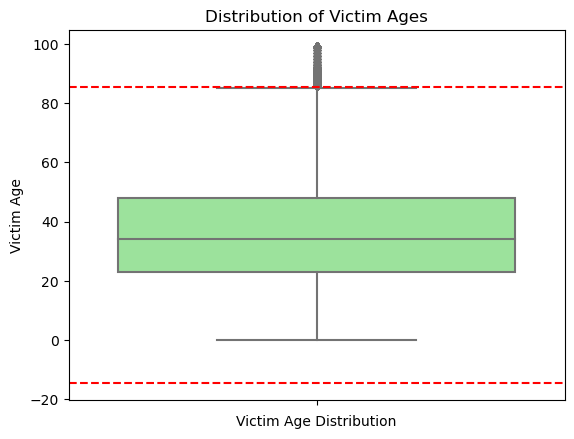

In [84]:
# Calculate the quartiles

Turkey_fence_multiplier = 1.5

Quartile_1 = df['Vict Age'].quantile(0.25)
Quartile_3 = df['Vict Age'].quantile(0.75)

# Calculate the IQR
Inter_Quartile_Range = Quartile_3 - Quartile_1

print('The Inter Quartile Range is:', Inter_Quartile_Range)

upper_bound_volume = Quartile_3 + Turkey_fence_multiplier * Inter_Quartile_Range
lower_bound_volume = Quartile_1 - Turkey_fence_multiplier * Inter_Quartile_Range

#analyzing the victims age range
import seaborn as sns
sns.boxplot(y='Vict Age',
            color = 'lightgreen',
            data = df)


# Add IQR to the boxplot
plt.axhline(lower_bound_volume, color='red', linestyle='dashed')
plt.axhline(upper_bound_volume, color='red', linestyle='dashed')


plt.xlabel('Victim Age Distribution')
plt.ylabel('Victim Age')
plt.title('Distribution of Victim Ages')

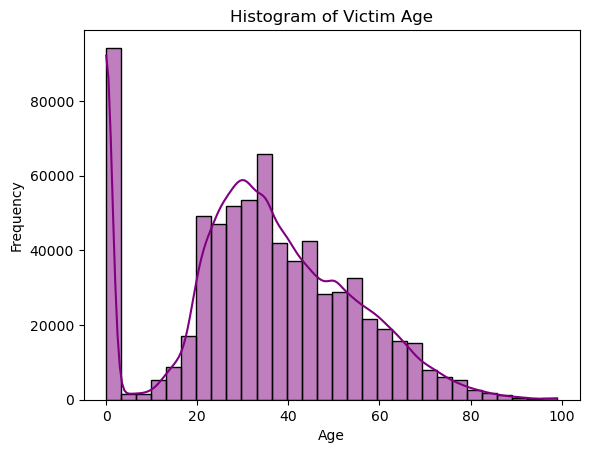

In [85]:
sns.histplot(df['Vict Age'], bins=30, kde=True, color='purple')
plt.title('Histogram of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Demographic Factors

In [174]:
crime_type_dist = df.groupby(['Crm Cd','Crm Cd Desc'],as_index=False).agg({'DR_NO':'count'})
crime_type_dist.columns = ['Crm Cd','Crm Cd Desc','crime_count']
crime_type_dist.sort_values(by='crime_count',inplace=True,ascending = False)
crime_type_dist['cumulative_sum'] = np.cumsum(crime_type_dist['crime_count'])
crime_type_dist['percent_crime_count'] = crime_type_dist['cumulative_sum']/crime_type_dist['crime_count'].sum()
crime_type_f = crime_type_dist[crime_type_dist['percent_crime_count']<0.8]
crime_type_f.head()

,Crm Cd,Crm Cd Desc,crime_count,cumulative_sum,percent_crime_count
60,624,BATTERY - SIMPLE ASSAULT,64559,64559,0.091555
26,354,THEFT OF IDENTITY,51506,116065,0.164599
15,330,BURGLARY FROM VEHICLE,49783,165848,0.235199
78,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",49483,215331,0.305374
13,310,BURGLARY,49351,264682,0.375361


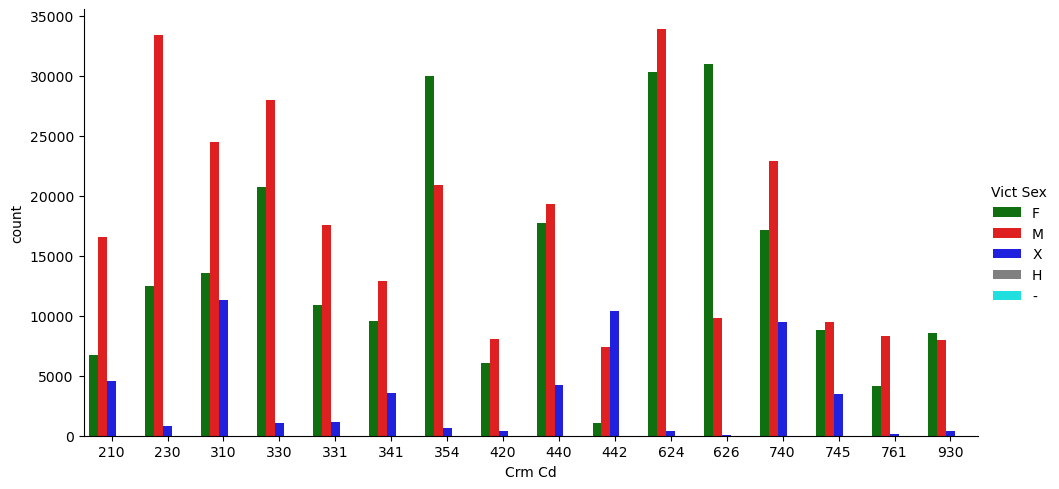

In [175]:
#distribution of gender across different type of crime
age_df = df[df['Crm Cd'].isin(crime_type_f['Crm Cd'])]
custom_palette = (1, 0, 0, 1)
sns.catplot(x = "Crm Cd", 
            data = age_df, 
            aspect = 2.0, 
            hue = 'Vict Sex',
            kind = "count",
            palette=sns.color_palette(['green', 'red','blue','gray','cyan']))

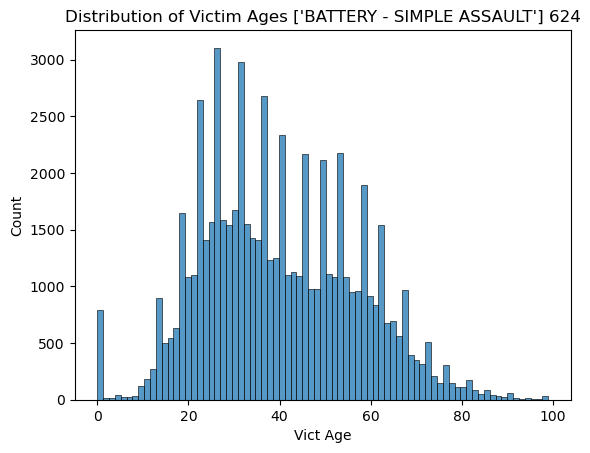

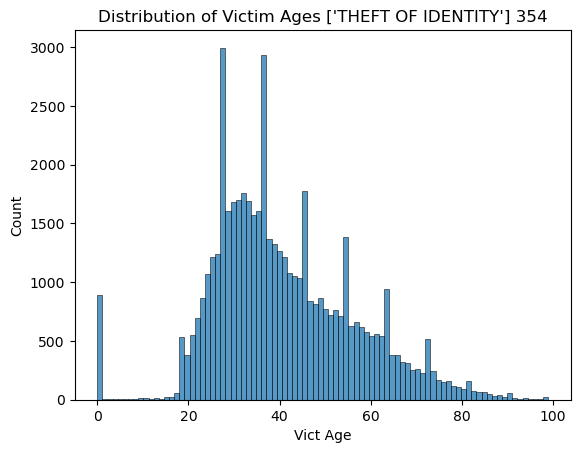

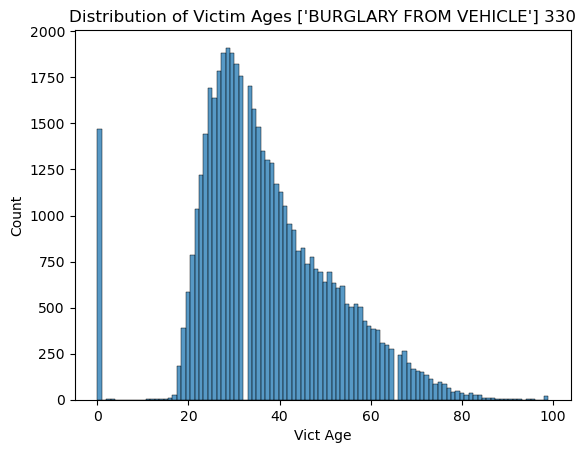

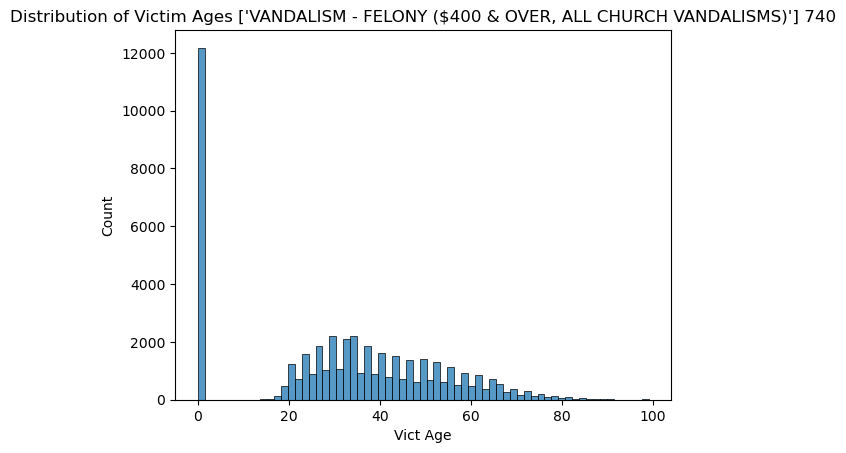

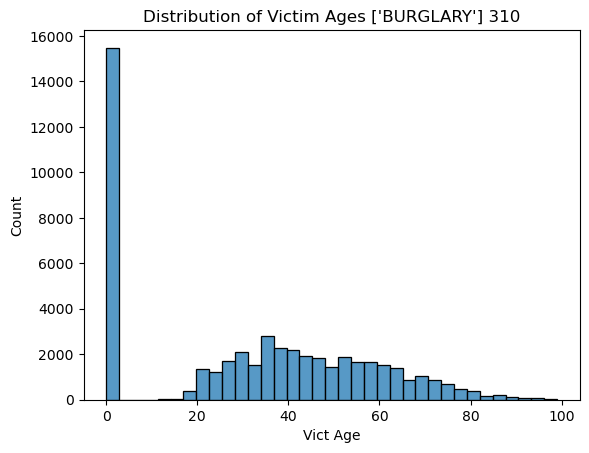

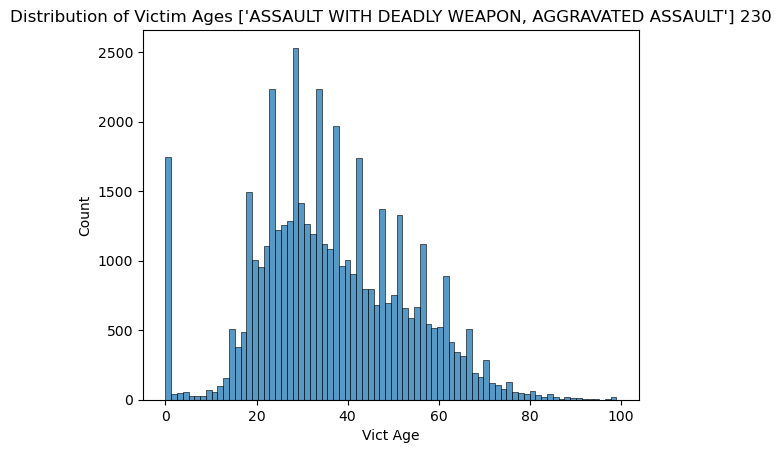

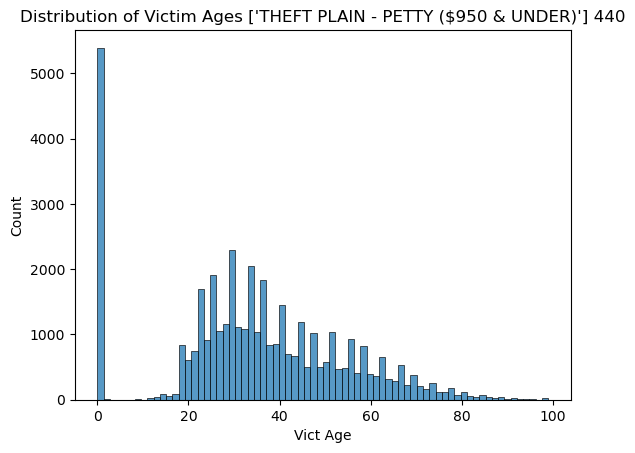

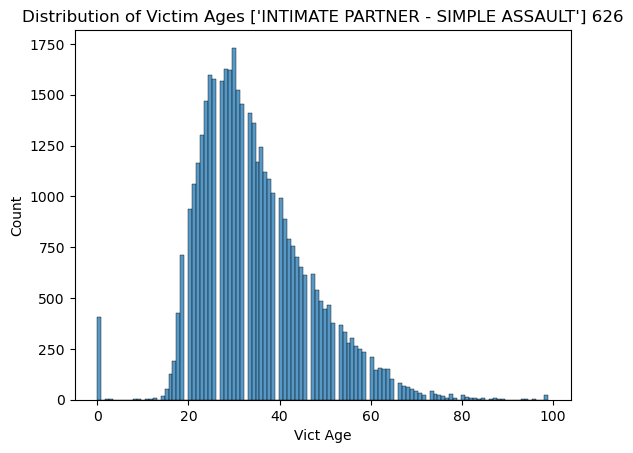

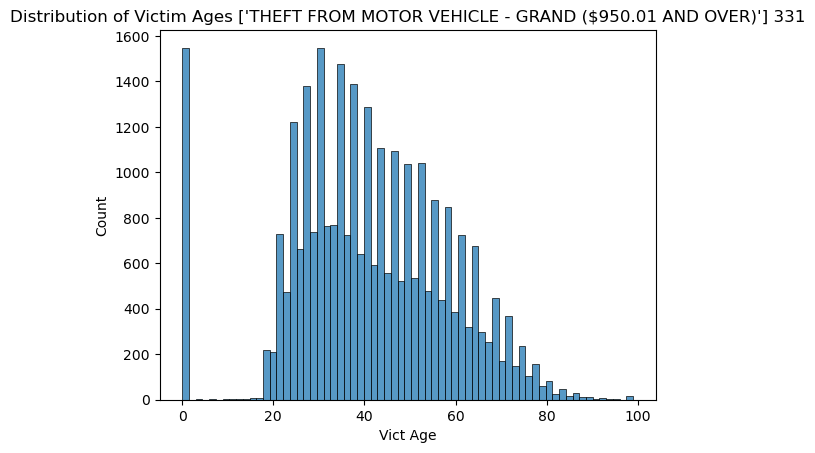

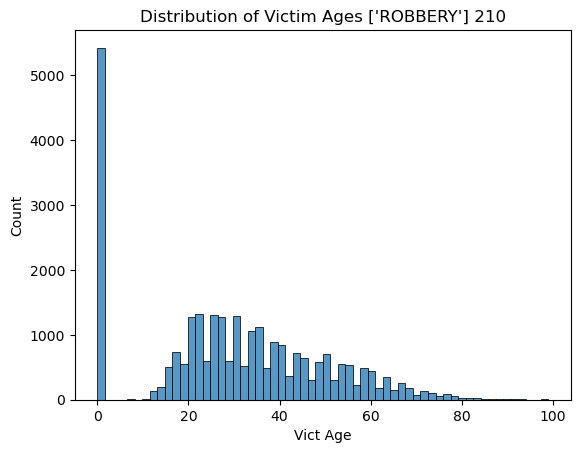

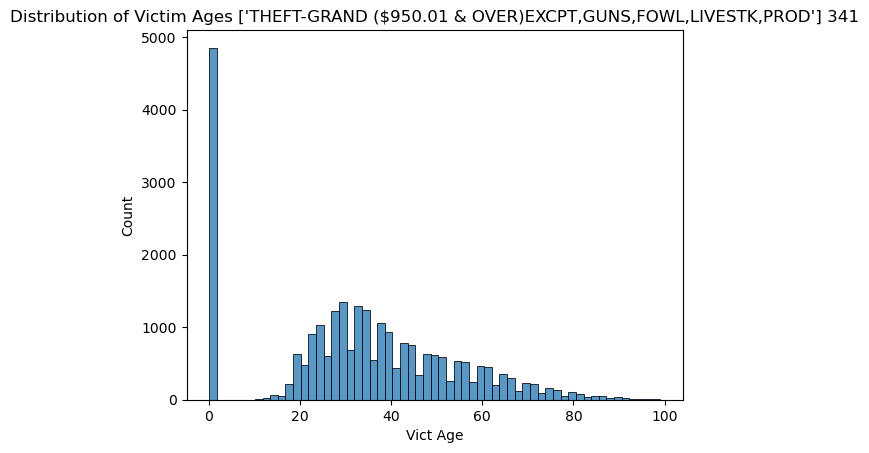

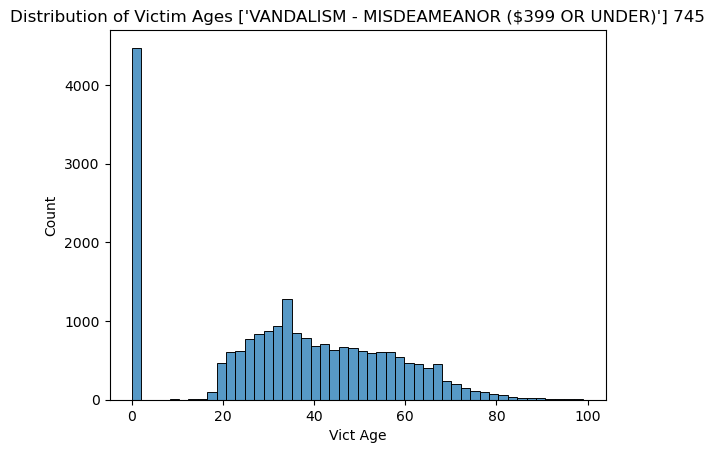

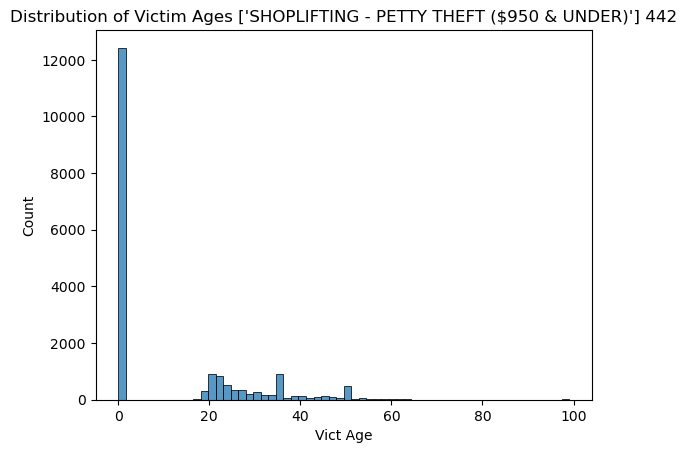

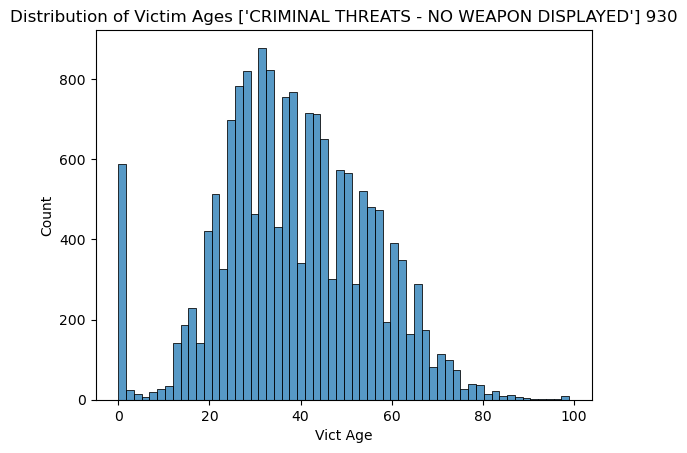

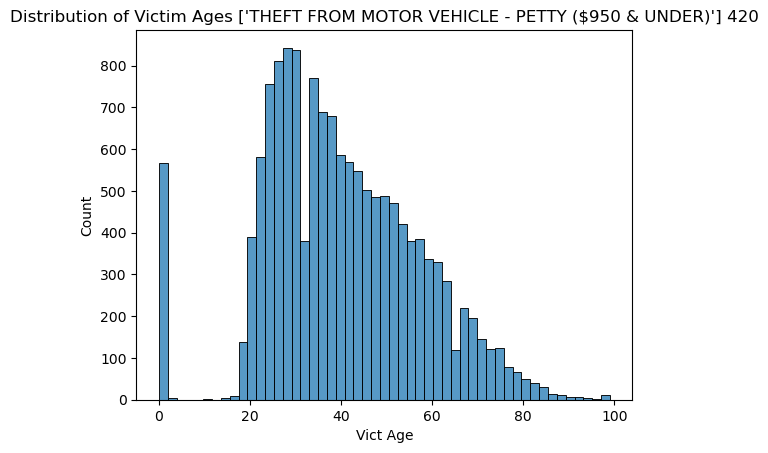

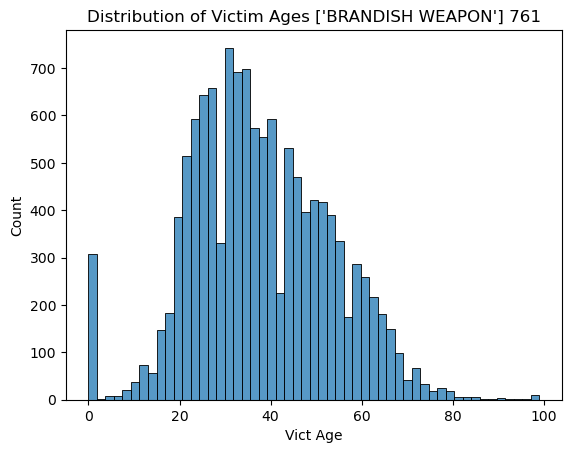

In [176]:
crimetype_list = crime_type_f['Crm Cd'].unique()
for i in crimetype_list:
    temp_df = df[df['Crm Cd']==i]
    ax = sns.histplot(temp_df['Vict Age'], kde = False)
    plt.title("Distribution of Victim Ages"+ " " + str(temp_df['Crm Cd Desc'].unique()) + " " + str(i))
    plt.show()

# Model Preparation

In [177]:
check = df.groupby('Date Rptd',as_index=False).agg({'Crm Cd':'count'})
check.columns = ['date','crime_count']
check.date = pd.to_datetime(check.date)
check['month'] = check['date'].dt.month
check['week'] = check['date'].dt.week
check['year'] = check['date'].dt.year
check['day'] = check['date'].dt.day
check.tail()

,date,crime_count,month,week,year,day
1366,2023-09-28,502,9,39,2023,28
1367,2023-09-29,530,9,39,2023,29
1368,2023-09-30,452,9,39,2023,30
1369,2023-10-01,374,10,39,2023,1
1370,2023-10-02,114,10,40,2023,2


In [206]:
check_month = check.groupby(['year','month'],as_index=False).agg({'crime_count':'sum'})
check_month['date'] = check_month['year'].astype(str) + "-" + check_month['month'].astype(str) + "-" + "1"
check_month['date'] = pd.to_datetime(check_month['date'])
check_month.head()

,year,month,crime_count,date
0,2020,1,14452,2020-01-01
1,2020,2,14882,2020-02-01
2,2020,3,13756,2020-03-01
3,2020,4,13052,2020-04-01
4,2020,5,14066,2020-05-01


In [179]:
check.sort_values(by='date',inplace=True)
check.head()

,date,crime_count,month,week,year,day
0,2020-01-01,345,1,1,2020,1
1,2020-01-02,372,1,1,2020,2
2,2020-01-03,362,1,1,2020,3
3,2020-01-04,383,1,1,2020,4
4,2020-01-05,388,1,1,2020,5


In [207]:
print(check_month.shape)
check_month = pd.merge(check_month, df_Inflation_20, left_on='date', right_on='DATE', how='left')
check_month = pd.merge(check_month, df_CPI_20, left_on='date', right_on='DATE', how='left')
check_month = pd.merge(check_month, df_interest_rates_20, left_on='date', right_on='DATE', how='left')
check_month = pd.merge(check_month, df_unemp_20, left_on='date', right_on='DATE', how='left')
print(check_month.shape)
check_month.head(2)

(46, 4)
(46, 12)


,year,month,crime_count,date,DATE_x,InflationRate,DATE_y,CPI,DATE_x,FEDFUNDS,DATE_y,CALOSA7URN
0,2020,1,14452,2020-01-01,2020-01-01,2.5,2020-01-01,257.971,2020-01-01,1.55,2020-01-01,4.9
1,2020,2,14882,2020-02-01,2020-02-01,2.3,2020-02-01,258.678,2020-02-01,1.58,2020-02-01,4.9


In [208]:
check_month.tail()

,year,month,crime_count,date,DATE_x,InflationRate,DATE_y,CPI,DATE_x,FEDFUNDS,DATE_y,CALOSA7URN
41,2023,6,16487,2023-06-01,2023-06-01,3.0,2023-06-01,305.109,2023-06-01,5.08,2023-06-01,5.3
42,2023,7,17289,2023-07-01,2023-07-01,3.2,2023-07-01,305.691,2023-07-01,5.12,2023-07-01,5.4
43,2023,8,17401,2023-08-01,2023-08-01,3.7,2023-08-01,307.026,2023-08-01,5.33,2023-08-01,5.8
44,2023,9,16172,2023-09-01,2023-09-01,3.7,2023-09-01,307.789,2023-09-01,5.33,NaT,NaN
45,2023,10,488,2023-10-01,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [209]:
check_month = check_month[['date', 'crime_count', 'month', 'year','InflationRate','CPI','FEDFUNDS','CALOSA7URN']]

In [210]:
check_month = check_month.fillna(method='ffill')

In [211]:
check_month['date'] = pd.to_datetime(check_month['date'])
train_month = check_month[check_month['date']<='2023-05-01']
test_month = check_month[check_month['date']>'2023-05-01']

In [185]:
check['date'] = pd.to_datetime(check['date'])
train = check[check['date']<='2023-08-31']
test = check[check['date']>'2023-08-31']

## ARIMA without regressor

In [188]:
forecaster = AutoARIMA(suppress_warnings = True, error_action = "ignore", sp = 12, start_p=0,start_q=0,max_p=5, max_d=1, max_q=5, start_P=0,start_Q =0,max_P=2, max_D=1, max_Q=2, seasonal=True)
forecaster.fit(train[['crime_count']],X = None)

AutoARIMA(error_action='ignore', max_d=1, sp=12, start_P=0, start_Q=0,
          start_p=0, start_q=0, suppress_warnings=True)

In [189]:
fh = ForecastingHorizon(np.arange(32)+1)

In [190]:
loop_ts = pd.DataFrame()
loop_ts = pd.date_range(start = '2023-09-01', end = '2023-10-02', freq = 'd')

In [191]:
loop_forec = forecaster.predict(fh).astype(int)
loop_forec.columns = ['crime_count_predicted']

In [192]:
loop_forec['date'] = loop_ts
loop_forec = loop_forec[['date','crime_count_predicted']]
loop_forec.head()

,date,crime_count_predicted
1339,2023-09-01,583
1340,2023-09-02,537
1341,2023-09-03,566
1342,2023-09-04,589
1343,2023-09-05,565


In [193]:
print(loop_forec.shape)
loop_forec = loop_forec.merge(test,how='left',on='date')
loop_forec.shape

(32, 2)


(32, 7)

In [194]:
loop_forec['Ordinary_least_square'] = (loop_forec['crime_count'] - loop_forec['crime_count_predicted'])**2
loop_forec.head()

,date,crime_count_predicted,crime_count,month,week,year,day,Ordinary_least_square
0,2023-09-01,583,584,9,35,2023,1,1
1,2023-09-02,537,508,9,35,2023,2,841
2,2023-09-03,566,602,9,35,2023,3,1296
3,2023-09-04,589,536,9,36,2023,4,2809
4,2023-09-05,565,650,9,36,2023,5,7225


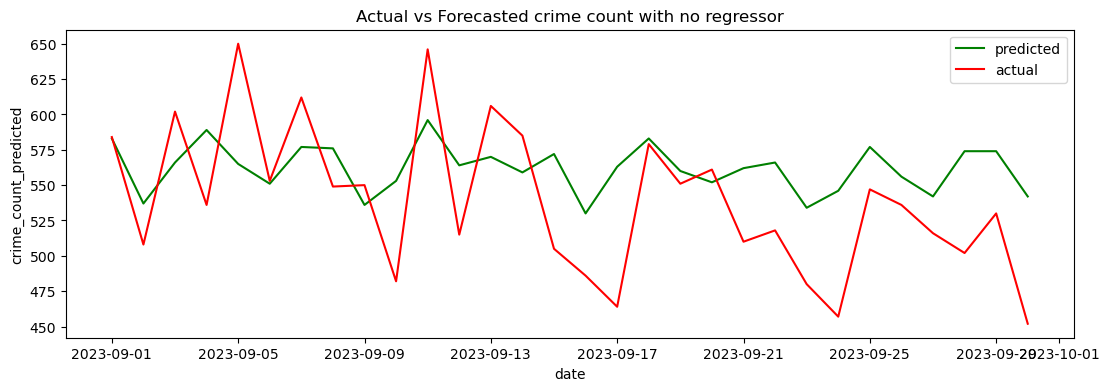

In [233]:
plt.figure(figsize=(13,4))
loop_forec = loop_forec[loop_forec['date']<='2023-09-30']
ax = sns.lineplot(x="date", y="crime_count_predicted",data= loop_forec,color='green',label='predicted')
ax = sns.lineplot(x="date", y="crime_count", data= loop_forec,color='red',label='actual')
plt.title("Actual vs Forecasted crime count with no regressor")
plt.show()

In [196]:
loop_forec['abs_error'] = abs(loop_forec['crime_count_predicted'] - loop_forec['crime_count'])
loop_forec['accuracy'] = round((1- loop_forec['abs_error']/loop_forec['crime_count'])*100,2)
loop_forec['accuracy'].mean()

91.823

In [197]:
review_df = pd.concat([train,loop_forec])
review_df.tail()
# review_df.to_csv("forecast_without_regressors.csv",index=False)

,date,crime_count,month,week,year,day,crime_count_predicted,Ordinary_least_square,abs_error,accuracy
25,2023-09-26,536,9,39,2023,26,556.0,400.0,20.0,96.27
26,2023-09-27,516,9,39,2023,27,542.0,676.0,26.0,94.96
27,2023-09-28,502,9,39,2023,28,574.0,5184.0,72.0,85.66
28,2023-09-29,530,9,39,2023,29,574.0,1936.0,44.0,91.70
29,2023-09-30,452,9,39,2023,30,542.0,8100.0,90.0,80.09


## ARIMA with regressor

### Forecast at daily level with day as a regressor

In [235]:
forecaster_r = AutoARIMA(suppress_warnings=True, error_action="ignore", sp=12,
                       start_p=0, start_q=0, max_p=5, max_d=1, max_q=5,
                       start_P=0, start_Q=0, max_P=2, max_D=1, max_Q=2,
                       seasonal=True)
forecaster_r.fit(train[['crime_count']], X=train[['day']])


fh_r = ForecastingHorizon(np.arange(32)+1)

loop_ts_r = pd.DataFrame()
loop_ts_r = pd.date_range(start = '2023-09-01', end = '2023-10-02', freq = 'd')


loop_forec_r = forecaster_r.predict(fh_r, X=test[['day']])
loop_forec_r = loop_forec_r.astype(int)
loop_forec_r.columns = ['crime_count_predicted_r']

loop_forec_r['date'] = loop_ts_r
loop_forec_r = loop_forec_r[['date','crime_count_predicted_r']]

loop_forec_r = loop_forec_r.merge(test,how='left',on='date')

loop_forec_r.head()

,date,crime_count_predicted_r,crime_count,month,week,year,day
0,2023-09-01,618,584,9,35,2023,1
1,2023-09-02,551,508,9,35,2023,2
2,2023-09-03,598,602,9,35,2023,3
3,2023-09-04,613,536,9,36,2023,4
4,2023-09-05,622,650,9,36,2023,5


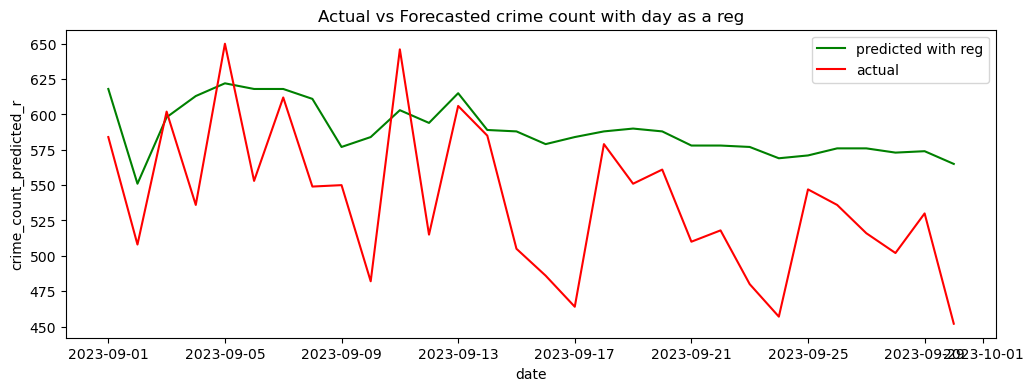

In [236]:
plt.figure(figsize=(12,4))
loop_forec_r = loop_forec_r[loop_forec_r['date']<='2023-09-30']
ax = sns.lineplot(x="date", y="crime_count_predicted_r",data= loop_forec_r,color='green',label='predicted with reg')
ax = sns.lineplot(x="date", y="crime_count", data= loop_forec_r,color='red',label='actual')
plt.title("Actual vs Forecasted crime count with day as a reg")
plt.show()

In [200]:
loop_forec_r['abs_error'] = abs(loop_forec_r['crime_count_predicted_r'] - loop_forec_r['crime_count'])
loop_forec_r['accuracy'] = round((1- loop_forec_r['abs_error']/loop_forec_r['crime_count'])*100,2)
loop_forec_r['accuracy'].mean()

89.223

### Forecast at month level with InflationRate ,Consumer price index, Unemployment Rate and Federal Funds Rates as a regressor

In [215]:
test_month

,date,crime_count,month,year,InflationRate,CPI,FEDFUNDS,CALOSA7URN
41,2023-06-01,16487,6,2023,3.0,305.109,5.08,5.3
42,2023-07-01,17289,7,2023,3.2,305.691,5.12,5.4
43,2023-08-01,17401,8,2023,3.7,307.026,5.33,5.8
44,2023-09-01,16172,9,2023,3.7,307.789,5.33,5.8
45,2023-10-01,488,10,2023,3.7,307.789,5.33,5.8


In [222]:
fh_r = ForecastingHorizon(np.arange(5)+1)
fh_r
loop_ts_m = pd.DataFrame()
loop_ts_m = pd.date_range(start = '2023-06-01', end = '2023-11-01', freq = 'm')
loop_ts_m = loop_ts_m.to_period('M').to_timestamp()
loop_ts_m

DatetimeIndex(['2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [223]:
forecaster_m = AutoARIMA(suppress_warnings=True, error_action="warn", sp=12,
                       start_p=0, start_q=0, max_p=2, max_d=1, max_q=2,
                       start_P=0, start_Q=0, max_P=1, max_D=1, max_Q=1,
                       seasonal=True)
forecaster_m.fit(train_month[['crime_count']], X=train_month[['InflationRate','CPI','FEDFUNDS','CALOSA7URN']])


fh_r = ForecastingHorizon(np.arange(5)+1)

loop_ts_m = pd.DataFrame()
loop_ts_m = pd.date_range(start = '2023-06-01', end = '2023-11-01', freq = 'm')
loop_ts_m = loop_ts_m.to_period('M').to_timestamp()

loop_forec_m = forecaster_m.predict(fh_r, X=test_month[['InflationRate','CPI','FEDFUNDS','CALOSA7URN']])
loop_forec_m = loop_forec_m.astype(int)
loop_forec_m.columns = ['crime_count_predicted_m']

loop_forec_m['date'] = loop_ts_m
loop_forec_m = loop_forec_m[['date','crime_count_predicted_m']]

loop_forec_m = loop_forec_m.merge(test_month,how='left',on='date')

loop_forec_m.head()

,date,crime_count_predicted_m,crime_count,month,year,InflationRate,CPI,FEDFUNDS,CALOSA7URN
0,2023-06-01,16679,16487,6,2023,3.0,305.109,5.08,5.3
1,2023-07-01,16773,17289,7,2023,3.2,305.691,5.12,5.4
2,2023-08-01,17021,17401,8,2023,3.7,307.026,5.33,5.8
3,2023-09-01,17058,16172,9,2023,3.7,307.789,5.33,5.8
4,2023-10-01,17058,488,10,2023,3.7,307.789,5.33,5.8


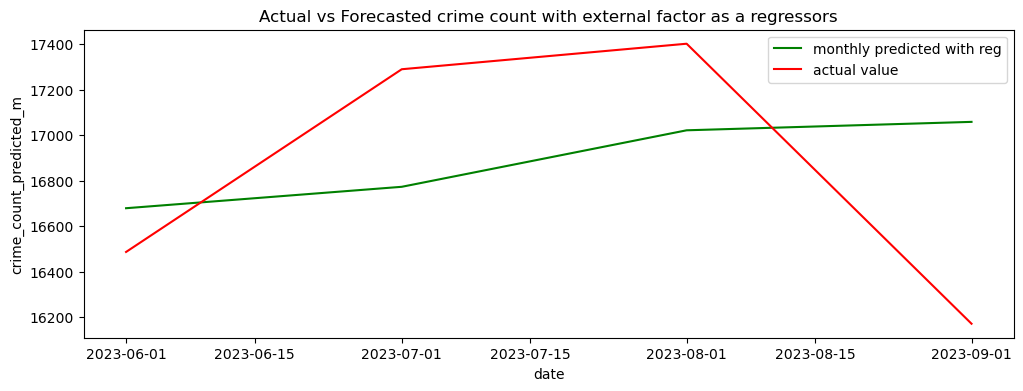

In [237]:
plt.figure(figsize=(12,4))
loop_forec_m = loop_forec_m[loop_forec_m['date']<='2023-09-01']
ax = sns.lineplot(x="date", y="crime_count_predicted_m",data= loop_forec_m,color='green',label='monthly predicted with reg')
ax = sns.lineplot(x="date", y="crime_count", data= loop_forec_m,color='red',label='actual value')
plt.title("Actual vs Forecasted crime count with external factor as a regressors")
plt.show()

In [229]:
loop_forec_m['abs_error'] = abs(loop_forec_m['crime_count_predicted_m'] - loop_forec_m['crime_count'])
loop_forec_m['accuracy'] = round((1- loop_forec_m['abs_error']/loop_forec_m['crime_count'])*100,2)
loop_forec_m[['date','accuracy']]

,date,accuracy
0,2023-06-01,98.84
1,2023-07-01,97.02
2,2023-08-01,97.82
3,2023-09-01,94.52
